# Część 1 - obróbka danych

1. Poprawne wczytanie danych z pliku

In [1]:
# Importujemy pakiety do przetwarzania danych oraz wizualizacji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Wczytujemy dane z pliku csv
df_data = pd.read_csv('Loan_data.csv')

C:\Users\Małgosia\AppData\Local\Temp\ipykernel_8600\4154624107.py:2: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv('Loan_data.csv')


In [3]:
# Pięć pierwszych wierszy ramki danych
df_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0   10.65%       162.87     B        B2  ...                            NaN   
1   15.27%        59.83     C        C4  ...                            NaN   
2   15.96%        84.33     C        C5  ...                            NaN   
3   13.49%       339.31     C        C1  ...                            NaN   
4   12.69%        67.79     B        B5  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

2. Usunięcie kolumn które zawierają informacje z przyszłości, niedostępne w momencie udzielania pożyczki

In [4]:
# Kolumny zawierające dane o pożyczce z przyszłości to wszystkie związane z ugodą - settlement. Usuwamy je.
df_data.columns[df_data.columns.str.startswith('settlement')]

Index(['settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object')

In [5]:
future = ['settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [6]:
df_data = df_data.drop(columns=future)

In [7]:
# Kolumny total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee
# last_pymnt_d, last_pymnt_amnt, last_credit_pull_d to kolumny niedostępne w momencie brania pożyczki. Usuwamy
# Kolumna issue_d - usuwamy, to miesiąc spłaty pożyczki. Cecha z przyszłości - usuwamy.
feature_cols = ['total_pymnt', 
                'total_pymnt_inv', 
                'total_rec_prncp', 
                'total_rec_int',
                'total_rec_late_fee',
                'recoveries',
                'issue_d',
                'collection_recovery_fee',
                'last_pymnt_d',
                'last_pymnt_amnt',
                'last_credit_pull_d']

In [8]:
df_data = df_data.drop(columns=feature_cols)

In [9]:
# Usunięto 12 kolumn
df_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... payment_plan_start_date  \
0   10.65%       162.87     B        B2  ...                     NaN   
1   15.27%        59.83     C        C4  ...                     NaN   
2   15.96%        84.33     C        C5  ...                     NaN   
3   13.49%       339.31     C        C1  ...                     NaN   
4   12.69%        67.79     B        B5  ...                     NaN   

  hardship_length hardship_dpd  hardship_loan_status  \
0             NaN          NaN                   NaN   
1             NaN          NaN                   NaN   
2             NaN          NaN                   NaN   
3             NaN          NaN                   NaN   
4             NaN          NaN                   NaN   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   
2                                        NaN                            NaN   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

  hardship_last_payment_amount disbursement_method debt_settlement_flag  \
0                          NaN                Cash                    N   
1                          NaN                Cash                    N   
2                          NaN                Cash                    N   
3                          NaN                Cash                    N   
4                          NaN                Cash                    N   

  debt_settlement_flag_date  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 135 columns]

3. Usunięcie kolumn ze zbędnymi informacjami

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 135 entries, id to debt_settlement_flag_date
dtypes: float64(109), object(26)
memory usage: 43.8+ MB


In [11]:
# Usuwamy kolumny z brakującymi danymi (albo takimi, których jest bardzo mało)
df_data_count = df_data.count()

In [12]:
# Zerknijmy na wypełnienie danymi każdej z kolumn
for i, count in enumerate(df_data_count):
    print(df_data.columns[i],'-', count)

id - 42536
member_id - 0
loan_amnt - 42535
funded_amnt - 42535
funded_amnt_inv - 42535
term - 42535
int_rate - 42535
installment - 42535
grade - 42535
sub_grade - 42535
emp_title - 39909
emp_length - 41423
home_ownership - 42535
annual_inc - 42531
verification_status - 42535
loan_status - 42535
pymnt_plan - 42535
url - 42535
desc - 29242
purpose - 42535
title - 42522
zip_code - 42535
addr_state - 42535
dti - 42535
delinq_2yrs - 42506
earliest_cr_line - 42506
fico_range_low - 42535
fico_range_high - 42535
inq_last_6mths - 42506
mths_since_last_delinq - 15609
mths_since_last_record - 3651
open_acc - 42506
pub_rec - 42506
revol_bal - 42535
revol_util - 42445
total_acc - 42506
initial_list_status - 42535
out_prncp - 42535
out_prncp_inv - 42535
next_pymnt_d - 2749
last_fico_range_high - 42535
last_fico_range_low - 42535
collections_12_mths_ex_med - 42390
mths_since_last_major_derog - 0
policy_code - 42535
application_type - 42535
annual_inc_joint - 0
dti_joint - 0
verification_status_joint 

In [13]:
# Bardzo dużo kolumn jest pustych - ustalamy minimalny próg wypełnienia na 70% 
threshold = round(0.7*len(df_data))

In [14]:
threshold

29775

In [15]:
# Kolumny do usunięcia - znajdujące się poniżej zadanego progu wypełnienia
cols_to_remove = df_data_count[df_data_count < threshold].index
cols_to_remove = list(cols_to_remove)
cols_to_remove

['member_id',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',

In [16]:
len(cols_to_remove)

87

In [17]:
# Bardzo dużo kolumn zostanie usuniętych - jest to aż 87 kolumn, które nie spełniają założenia 70% wypełnienia danymi.

In [18]:
df_data = df_data.drop(columns=cols_to_remove)

In [19]:
df_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2  1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3  1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4  1075358     3000.0       3000.0           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title  ... policy_code  \
0       162.87     B        B2                       NaN  ...         1.0   
1        59.83     C        C4                     Ryder  ...         1.0   
2        84.33     C        C5                       NaN  ...         1.0   
3       339.31     C        C1       AIR RESOURCES BOARD  ...         1.0   
4        67.79     B        B5  University Medical Group  ...         1.0   

  application_type  acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0       Individual             0.0                      0.0         0.0   
1       Individual             0.0                      0.0         0.0   
2       Individual             0.0                      0.0         0.0   
3       Individual             0.0                      0.0         0.0   
4       Individual             0.0                      0.0         0.0   

  pub_rec_bankruptcies tax_liens hardship_flag disbursement_method  \
0                  0.0       0.0             N                Cash   
1                  0.0       0.0             N                Cash   
2                  0.0       0.0             N                Cash   
3                  0.0       0.0             N                Cash   
4                  0.0       0.0             N                Cash   

  debt_settlement_flag  
0                    N  
1                    N  
2                    N  
3                    N  
4                    N  

[5 rows x 48 columns]

In [20]:
# Wypełnienie możemy również zwizualizować

<AxesSubplot:>

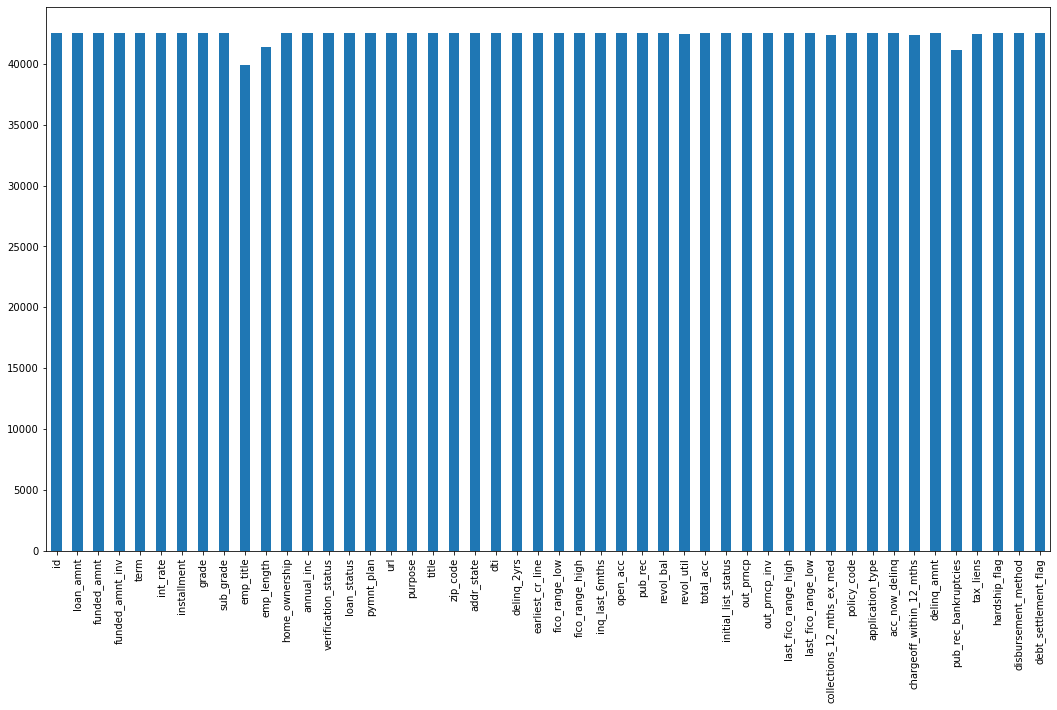

In [21]:
# Zwizualizujmy kompletność danych na wykresie
df_data_count = df_data.count()
plt.figure(figsize=(18, 10))
df_data_count.plot(kind = 'bar')

In [22]:
# Na tym zakończymy usuwanie kolumn, jednak nie jest wykluczone, że podczas dalszej analizy znalezione zostaną inne kolumny
# z informacjami z przyszłości i wtedy zostaną one usunięte.

4. Usunięcie kolumn tylko jedną unikalną wartością

In [23]:
# Wypiszmy liczbe unikalnych wartości w kazdej z kolumn i utwórzmy listę tych, gdzie znajduje się tylko jedna unikalna
non_uniqe = []
for col in df_data.columns:
    print(col, '-', len((df_data[col].value_counts())))
    if(len((df_data[col].value_counts())) == 1):
        non_uniqe.append(col)

id - 42536
loan_amnt - 898
funded_amnt - 1051
funded_amnt_inv - 9248
term - 2
int_rate - 394
installment - 16459
grade - 7
sub_grade - 35
emp_title - 30658
emp_length - 11
home_ownership - 5
annual_inc - 5597
verification_status - 3
loan_status - 4
pymnt_plan - 1
url - 42535
purpose - 14
title - 21264
zip_code - 837
addr_state - 50
dti - 2894
delinq_2yrs - 12
earliest_cr_line - 530
fico_range_low - 44
fico_range_high - 44
inq_last_6mths - 28
open_acc - 44
pub_rec - 6
revol_bal - 22709
revol_util - 1119
total_acc - 83
initial_list_status - 1
out_prncp - 1
out_prncp_inv - 1
last_fico_range_high - 72
last_fico_range_low - 71
collections_12_mths_ex_med - 1
policy_code - 1
application_type - 1
acc_now_delinq - 2
chargeoff_within_12_mths - 1
delinq_amnt - 3
pub_rec_bankruptcies - 3
tax_liens - 2
hardship_flag - 1
disbursement_method - 1
debt_settlement_flag - 2


In [24]:
# Otrzymujemy listę kolumn z jedną wartością unikalną - od razu je usuwamy
non_uniqe

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths',
 'hardship_flag',
 'disbursement_method']

In [25]:
df_data = df_data.drop(columns=non_uniqe)

In [26]:
df_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2  1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3  1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4  1075358     3000.0       3000.0           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title  ... revol_bal  \
0       162.87     B        B2                       NaN  ...   13648.0   
1        59.83     C        C4                     Ryder  ...    1687.0   
2        84.33     C        C5                       NaN  ...    2956.0   
3       339.31     C        C1       AIR RESOURCES BOARD  ...    5598.0   
4        67.79     B        B5  University Medical Group  ...   27783.0   

  revol_util  total_acc last_fico_range_high last_fico_range_low  \
0      83.7%        9.0                739.0               735.0   
1       9.4%        4.0                499.0                 0.0   
2      98.5%       10.0                739.0               735.0   
3        21%       37.0                604.0               600.0   
4      53.9%       38.0                684.0               680.0   

  acc_now_delinq delinq_amnt pub_rec_bankruptcies tax_liens  \
0            0.0         0.0                  0.0       0.0   
1            0.0         0.0                  0.0       0.0   
2            0.0         0.0                  0.0       0.0   
3            0.0         0.0                  0.0       0.0   
4            0.0         0.0                  0.0       0.0   

  debt_settlement_flag  
0                    N  
1                    N  
2                    N  
3                    N  
4                    N  

[5 rows x 38 columns]

In [27]:
# Po redukcji mamy 38 kolumny

5. Rzut okiem na wartości w kolumnie ze statusem pożyczki

In [28]:
# Wykonajmy opis ramki
df_data['loan_status'].describe()

count          42535
unique             4
top       Fully Paid
freq           34116
Name: loan_status, dtype: object

In [29]:
# Najczęściej występuje Fully Paid.

In [30]:
df_data['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

6. Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [31]:
# Przyjęta metodologia jest następująca - analizujemy każdą z kolumn po kolei.
df_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag'],
      dtype='object')

In [32]:
# Kolumna ID - zdecydowanie możemy ją usunąć - to zwykły identyfikator
df_data = df_data.drop(columns=['id'])

In [33]:
# Kolumna load_amnt (wysokośc pożyczki) - zostawiamy.
df_data['loan_amnt'].value_counts()

10000.0    3016
12000.0    2439
5000.0     2260
6000.0     2037
15000.0    2012
           ... 
10350.0       1
19100.0       1
17975.0       1
31150.0       1
20425.0       1
Name: loan_amnt, Length: 898, dtype: int64

In [34]:
# Kolumna funded_amnt - zostawiamy
df_data['funded_amnt'].value_counts()

10000.0    2924
12000.0    2347
5000.0     2247
6000.0     2023
15000.0    1897
           ... 
23625.0       1
19625.0       1
21425.0       1
27750.0       1
850.0         1
Name: funded_amnt, Length: 1051, dtype: int64

In [35]:
# Kolumna funded_amnt_inv - zostawiamy
df_data['funded_amnt_inv'].value_counts()

5000.000000     1369
10000.000000    1302
6000.000000     1240
12000.000000    1084
8000.000000      929
                ... 
5480.733306        1
14276.431140       1
10141.459843       1
10019.969442       1
1099.996405        1
Name: funded_amnt_inv, Length: 9248, dtype: int64

In [36]:
# Kolumna term - trzeba zostawić same wartości numeryczne 36 i 60, usuwamy "months"
df_data['term'].value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

In [37]:
df_data['term'] = df_data['term'].apply(lambda data: data.replace(" months", "") if(isinstance(data, str)) else data)

In [38]:
df_data['term'].value_counts() # W porządku.

 36    31534
 60    11001
Name: term, dtype: int64

In [39]:
# Kolumna int_rate - usuwamy znaczki %
df_data['int_rate'].value_counts()

 10.99%    970
 11.49%    837
 13.49%    832
  7.51%    787
  7.88%    742
          ... 
 17.46%      1
 21.48%      1
 24.40%      1
 16.83%      1
 16.20%      1
Name: int_rate, Length: 394, dtype: int64

In [40]:
df_data['int_rate'] = df_data['int_rate'].apply(lambda data: data.replace("%", "") if(isinstance(data, str)) else data)

In [41]:
# Teraz jest w porządku
df_data['int_rate'].value_counts()

 10.99    970
 11.49    837
 13.49    832
  7.51    787
  7.88    742
         ... 
 17.46      1
 21.48      1
 24.40      1
 16.83      1
 16.20      1
Name: int_rate, Length: 394, dtype: int64

In [42]:
# Kolumna installment - w porządku
df_data['installment'].value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
357.77     1
809.53     1
48.93      1
405.46     1
204.84     1
Name: installment, Length: 16459, dtype: int64

In [43]:
# Kolumna grade - usuniemy, mamy subgrade która zawiera więcej informacji. 
df_data = df_data.drop(columns=['grade'])

In [44]:
# Kolumna sub_grade - w porządku. Do dalszego przetwarzania w kolejnym etapie.
df_data['sub_grade'].value_counts()

B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

In [45]:
# Kolumna emp_title
df_data['emp_title'].isna().sum()

2627

In [46]:
# Za dużo unikalnych wartości, dużo nan
df_data['emp_title'].value_counts()

US Army                             139
Bank of America                     115
IBM                                  72
Kaiser Permanente                    61
AT&T                                 61
                                   ... 
Regional Elite Airlines Services      1
Mass General Medical Group            1
Kontera                               1
Southeast Georgia Health ystem        1
Homemaker                             1
Name: emp_title, Length: 30658, dtype: int64

In [47]:
# Usuwamy
df_data = df_data.drop(columns=['emp_title'])

In [48]:
# Kolumna emp_length - mamy sporo znaków do usunięcia - +, <, years
df_data['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [49]:
df_data['emp_length'] = df_data['emp_length'].apply(lambda data: data.replace(" years","").replace("+","").replace("<","").replace(" year","") if isinstance(data,str) else data)

In [50]:
# Po usuwaniu - jest w porządku
df_data['emp_length'].value_counts()

10    9369
 1    5062
2     4743
3     4364
4     3649
1     3595
5     3458
6     2375
7     1875
8     1592
9     1341
Name: emp_length, dtype: int64

In [51]:
# Kolumna home_ownership - zostawiamy do dalszej analizy
df_data['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [52]:
# Kolumna annual_inc - w porządku.
df_data['annual_inc'].value_counts()

60000.0     1591
50000.0     1119
40000.0      935
45000.0      898
30000.0      884
            ... 
108820.0       1
85634.0        1
126996.0       1
57110.0        1
6500.0         1
Name: annual_inc, Length: 5597, dtype: int64

In [53]:
# Kolumna verification_status - do dalszej analizy.
df_data['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [54]:
# Kolumna loan_status - nasz target
df_data['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [55]:
# Kolumna url - usuwamy, kompletnie nieprzydatna cecha
df_data['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=538025     1
https://lendingclub.com/browse/loanDetail.action?loan_id=540325     1
https://lendingclub.com/browse/loanDetail.action?loan_id=540300     1
https://lendingclub.com/browse/loanDetail.action?loan_id=540270     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=770036     1
https://lendingclub.com/browse/loanDetail.action?loan_id=769217     1
https://lendingclub.com/browse/loanDetail.action?loan_id=770000     1
https://lendingclub.com/browse/loanDetail.action?loan_id=765994     1
https://lendingclub.com/browse/loanDetail.action?loan_id=70686      1
Name: url, Length: 42535, dtype: int64

In [56]:
df_data = df_data.drop(columns=['url'])

In [57]:
# Kolumna purpose - jest ok, do dalszej analizy
df_data['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [58]:
# Kolumna title - w porządku - do dalszej analizy. Obliczymy długość tekstu jako nową cechę.
df_data['title'].value_counts()

Debt Consolidation                  2259
Debt Consolidation Loan             1760
Personal Loan                        708
Consolidation                        547
debt consolidation                   532
                                    ... 
CitiCard PayOff                        1
Taxes Loan                             1
Blazing in 5 years                     1
I was scammed and now recovering       1
Aroundthehouse                         1
Name: title, Length: 21264, dtype: int64

In [59]:
# Kolumna zip_code - raczej nie będzie przydatna, usuniemy
df_data['zip_code'].value_counts()

100xx    649
945xx    559
606xx    548
112xx    538
070xx    503
        ... 
823xx      1
965xx      1
388xx      1
386xx      1
036xx      1
Name: zip_code, Length: 837, dtype: int64

In [60]:
df_data = df_data.drop(columns=['zip_code'])

In [61]:
# Kolumna addr_state - do dalszej analizy
df_data['addr_state'].value_counts()

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

In [62]:
# Kolumna dti
len(df_data['dti'].unique())

2895

In [63]:
# Usuwamy - wartości z przyszłości
df_data = df_data.drop(columns=['dti'])

In [64]:
# Kolumna delinq_2yrs - w porządku
df_data['delinq_2yrs'].value_counts()

0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
9.0         1
13.0        1
Name: delinq_2yrs, dtype: int64

In [65]:
# Kolumna earliest_cr_line - w porządku - do dalszej analizy
df_data['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [66]:
# Kolumna fico_range_low - w porządku
df_data['fico_range_low'].value_counts()

685.0    2310
700.0    2267
680.0    2228
695.0    2202
690.0    2196
675.0    1994
705.0    1970
720.0    1949
715.0    1891
725.0    1891
670.0    1854
665.0    1821
710.0    1771
730.0    1670
735.0    1653
660.0    1584
740.0    1490
745.0    1319
750.0    1294
755.0    1100
760.0     984
770.0     799
765.0     792
775.0     654
780.0     573
790.0     422
785.0     406
795.0     338
800.0     256
805.0     193
650.0     131
655.0     127
810.0     125
645.0     112
640.0     102
815.0      28
820.0      19
630.0       6
635.0       5
825.0       3
625.0       2
610.0       2
620.0       1
615.0       1
Name: fico_range_low, dtype: int64

In [67]:
# Kolumna fico_range_high - w porządku
df_data['fico_range_high'].value_counts()

689.0    2310
704.0    2267
684.0    2228
699.0    2202
694.0    2196
679.0    1994
709.0    1970
724.0    1949
719.0    1891
729.0    1891
674.0    1854
669.0    1821
714.0    1771
734.0    1670
739.0    1653
664.0    1584
744.0    1490
749.0    1319
754.0    1294
759.0    1100
764.0     984
774.0     799
769.0     792
779.0     654
784.0     573
794.0     422
789.0     406
799.0     338
804.0     256
809.0     193
654.0     131
659.0     127
814.0     125
649.0     112
644.0     102
819.0      28
824.0      19
634.0       6
639.0       5
829.0       3
629.0       2
614.0       2
624.0       1
619.0       1
Name: fico_range_high, dtype: int64

In [68]:
# Kolumna inq_last_6mths - w porządku
df_data['inq_last_6mths'].value_counts()

0.0     19657
1.0     11247
2.0      5987
3.0      3182
4.0      1056
5.0       596
6.0       339
7.0       182
8.0       115
9.0        50
10.0       24
11.0       15
12.0       15
15.0        9
13.0        6
14.0        6
18.0        4
16.0        3
17.0        2
24.0        2
19.0        2
32.0        1
33.0        1
31.0        1
28.0        1
25.0        1
27.0        1
20.0        1
Name: inq_last_6mths, dtype: int64

In [69]:
# Kolumna open_acc - w porządku
df_data['open_acc'].value_counts()

7.0     4252
8.0     4176
6.0     4172
9.0     3922
10.0    3386
5.0     3368
11.0    2944
4.0     2508
12.0    2398
13.0    2060
3.0     1608
14.0    1597
15.0    1290
16.0    1022
17.0     812
2.0      692
18.0     588
19.0     442
20.0     335
21.0     276
22.0     170
23.0     121
24.0      87
25.0      63
26.0      40
1.0       39
27.0      29
28.0      29
30.0      17
29.0      16
31.0      13
34.0       8
32.0       6
33.0       5
35.0       4
36.0       2
38.0       2
37.0       1
46.0       1
39.0       1
42.0       1
41.0       1
44.0       1
47.0       1
Name: open_acc, dtype: int64

In [70]:
# Kolumna pub_rec - w porządku
df_data['pub_rec'].value_counts()

0.0    40130
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [71]:
# Kolumna revol_bal - w porządku
df_data['revol_bal'].value_counts()

0.0        1119
255.0        14
298.0        14
1.0          13
682.0        12
           ... 
14170.0       1
43734.0       1
37778.0       1
59797.0       1
5251.0        1
Name: revol_bal, Length: 22709, dtype: int64

In [72]:
# Kolumna revol_util - musimy usunąc znaczki %
df_data['revol_util'].value_counts()

0%        1070
40.7%       65
0.2%        64
63%         63
66.6%       62
          ... 
21.59%       1
39.95%       1
0.01%        1
17.67%       1
105.7%       1
Name: revol_util, Length: 1119, dtype: int64

In [73]:
df_data['revol_util'] = df_data['revol_util'].apply(lambda data: data.replace("%", "") if(isinstance(data, str)) else data)

In [74]:
# Po usuwaniu - w porządku
df_data['revol_util'].value_counts()

0        1070
40.7       65
0.2        64
63         63
66.6       62
         ... 
21.59       1
39.95       1
0.01        1
17.67       1
105.7       1
Name: revol_util, Length: 1119, dtype: int64

In [75]:
# Kolumna total_acc - w porządku
df_data['total_acc'].value_counts()

15.0    1552
16.0    1547
17.0    1543
14.0    1531
20.0    1504
        ... 
74.0       1
77.0       1
78.0       1
72.0       1
90.0       1
Name: total_acc, Length: 83, dtype: int64

In [76]:
# Kolumna last_fico_range_high - w porządku
df_data['last_fico_range_high'].value_counts()

709.0    1256
694.0    1216
719.0    1204
724.0    1197
714.0    1175
         ... 
834.0     142
839.0      46
844.0      32
0.0        24
850.0      10
Name: last_fico_range_high, Length: 72, dtype: int64

In [77]:
# Kolumna last_fico_range_low - w porządku
df_data['last_fico_range_low'].value_counts()

705.0    1256
690.0    1216
715.0    1204
720.0    1197
710.0    1175
         ... 
505.0     189
830.0     142
835.0      46
840.0      32
845.0      10
Name: last_fico_range_low, Length: 71, dtype: int64

In [78]:
# Kolumna acc_now_delinq - mało wartości unikalnych - usuwamy
df_data['acc_now_delinq'].value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

In [79]:
df_data = df_data.drop(columns=['acc_now_delinq'])

In [80]:
# Kolumna delinq_amnt - analogia 
df_data['delinq_amnt'].value_counts()

0.0       42504
27.0          1
6053.0        1
Name: delinq_amnt, dtype: int64

In [81]:
df_data = df_data.drop(columns=['delinq_amnt'])

In [82]:
# Kolumna pub_rec_bankruptcies - w porządku
df_data['pub_rec_bankruptcies'].value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [83]:
# Kolumna tax_liens - brak wartości unikalnych
df_data['tax_liens'].value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [84]:
df_data = df_data.drop(columns=['tax_liens'])

In [85]:
# Kolumna debt_settlement_flag - w porzadku
df_data['debt_settlement_flag'].value_counts()

N    42375
Y      160
Name: debt_settlement_flag, dtype: int64

7. Analiza brakujących wartości wraz z ich uzupełnieniem/usunięciem przy wzięciu pod uwagę pewnych ustalonych kryteriów

In [86]:
# Po poprzednim kroku nasza ramka danych wygląda następująco - redukcja wielu kolumn (obecnie mamy 29 kolumn)
df_data.head()

loan_amnt  funded_amnt  funded_amnt_inv term int_rate  installment  \
0     5000.0       5000.0           4975.0   36    10.65       162.87   
1     2500.0       2500.0           2500.0   60    15.27        59.83   
2     2400.0       2400.0           2400.0   36    15.96        84.33   
3    10000.0      10000.0          10000.0   36    13.49       339.31   
4     3000.0       3000.0           3000.0   60    12.69        67.79   

  sub_grade emp_length home_ownership  annual_inc  ... inq_last_6mths  \
0        B2         10           RENT     24000.0  ...            1.0   
1        C4          1           RENT     30000.0  ...            5.0   
2        C5         10           RENT     12252.0  ...            2.0   
3        C1         10           RENT     49200.0  ...            1.0   
4        B5          1           RENT     80000.0  ...            0.0   

  open_acc pub_rec revol_bal revol_util  total_acc last_fico_range_high  \
0      3.0     0.0   13648.0       83.7        9.0                739.0   
1      3.0     0.0    1687.0        9.4        4.0                499.0   
2      2.0     0.0    2956.0       98.5       10.0                739.0   
3     10.0     0.0    5598.0         21       37.0                604.0   
4     15.0     0.0   27783.0       53.9       38.0                684.0   

   last_fico_range_low  pub_rec_bankruptcies  debt_settlement_flag  
0                735.0                   0.0                     N  
1                  0.0                   0.0                     N  
2                735.0                   0.0                     N  
3                600.0                   0.0                     N  
4                680.0                   0.0                     N  

[5 rows x 29 columns]

In [87]:
# Teraz musimy sprawdzić, jak dużo kolumn nie jest wypełnionych danymi - zdecydujemy czy usuwamy wiersze, czy jakoś 
# uzupełniamy.

<AxesSubplot:>

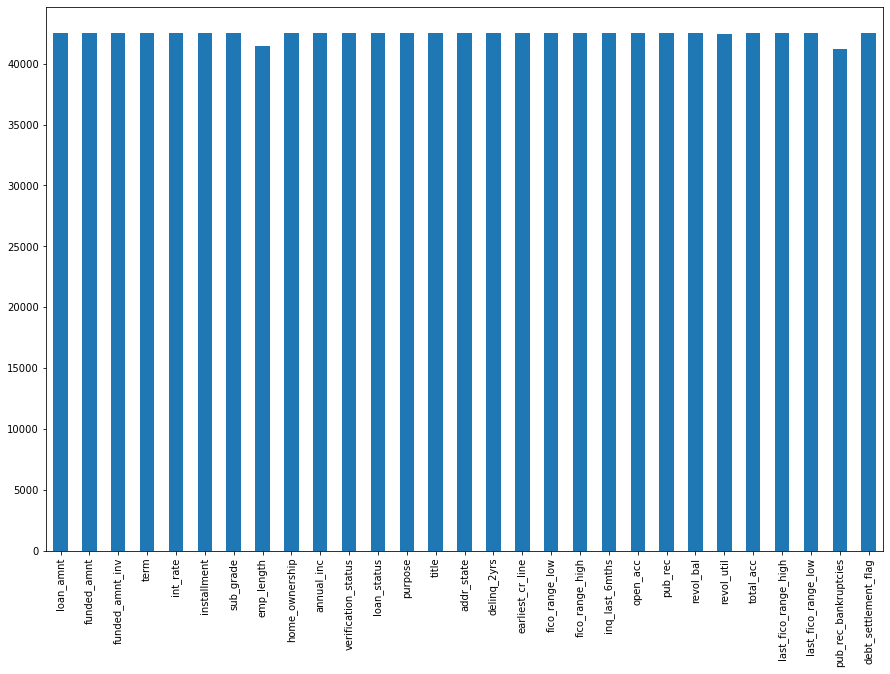

In [88]:
# Obejrzyjmy zapełnienie kolumn na wykresie
df_data_count = df_data.count()
plt.figure(figsize = (15, 10))
df_data_count.plot(kind='bar')

In [89]:
# Zobaczmy ile wartości nan jest w każdej z kolumn
for column in df_data.columns:
    print(column, 'wartości nan: ', df_data[column].isna().sum())

loan_amnt wartości nan:  1
funded_amnt wartości nan:  1
funded_amnt_inv wartości nan:  1
term wartości nan:  1
int_rate wartości nan:  1
installment wartości nan:  1
sub_grade wartości nan:  1
emp_length wartości nan:  1113
home_ownership wartości nan:  1
annual_inc wartości nan:  5
verification_status wartości nan:  1
loan_status wartości nan:  1
purpose wartości nan:  1
title wartości nan:  14
addr_state wartości nan:  1
delinq_2yrs wartości nan:  30
earliest_cr_line wartości nan:  30
fico_range_low wartości nan:  1
fico_range_high wartości nan:  1
inq_last_6mths wartości nan:  30
open_acc wartości nan:  30
pub_rec wartości nan:  30
revol_bal wartości nan:  1
revol_util wartości nan:  91
total_acc wartości nan:  30
last_fico_range_high wartości nan:  1
last_fico_range_low wartości nan:  1
pub_rec_bankruptcies wartości nan:  1366
debt_settlement_flag wartości nan:  1


In [90]:
# Sporo kolumn ma po jednej wartości nan - możemy usunąć te rekordy w których się znajdują.
df_data = df_data.dropna(axis = 0, thresh = 5)

In [91]:
for column in df_data.columns:
    if(df_data[column].isna().sum() != 0):
        print(column, 'wartości nan: ', df_data[column].isna().sum())
df_data = df_data.reset_index(drop = True)

emp_length wartości nan:  1112
annual_inc wartości nan:  4
title wartości nan:  13
delinq_2yrs wartości nan:  29
earliest_cr_line wartości nan:  29
inq_last_6mths wartości nan:  29
open_acc wartości nan:  29
pub_rec wartości nan:  29
revol_util wartości nan:  90
total_acc wartości nan:  29
pub_rec_bankruptcies wartości nan:  1365


In [92]:
# Usuwamy nan z annual_inc 
df_data = df_data[df_data['annual_inc'].notna()].reset_index(drop = True)

In [93]:
for column in df_data.columns:
    if(df_data[column].isna().sum() != 0):
        print(column, 'wartości nan: ', df_data[column].isna().sum())

emp_length wartości nan:  1112
title wartości nan:  13
delinq_2yrs wartości nan:  25
earliest_cr_line wartości nan:  25
inq_last_6mths wartości nan:  25
open_acc wartości nan:  25
pub_rec wartości nan:  25
revol_util wartości nan:  86
total_acc wartości nan:  25
pub_rec_bankruptcies wartości nan:  1361


In [94]:
# Analiza kolumny title
df_data['title'].isna().sum()

13

In [95]:
# Nie jesteśmy w stanie umputować danych - usuńmy te wiersze
df_data = df_data[df_data['title'].notna()].reset_index(drop = True)

In [96]:
for column in df_data.columns:
    if(df_data[column].isna().sum() != 0):
        print(column, 'wartości nan: ', df_data[column].isna().sum())

emp_length wartości nan:  1111
delinq_2yrs wartości nan:  25
earliest_cr_line wartości nan:  25
inq_last_6mths wartości nan:  25
open_acc wartości nan:  25
pub_rec wartości nan:  25
revol_util wartości nan:  86
total_acc wartości nan:  25
pub_rec_bankruptcies wartości nan:  1361


In [97]:
# Analiza kolumny earliest_cr_line  
df_data['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [98]:
# Tu również nie imputujemy danych - usuwamy wiersze
df_data = df_data[df_data['earliest_cr_line'].notna()].reset_index(drop = True)

In [99]:
for column in df_data.columns:
    if(df_data[column].isna().sum() != 0):
        print(column, 'wartości nan: ', df_data[column].isna().sum())

emp_length wartości nan:  1111
revol_util wartości nan:  61
pub_rec_bankruptcies wartości nan:  1336


In [100]:
# Nastąpiła znacząca redukcja wartości brakujących. 

In [101]:
# Analiza kolumny revol_util 
df_data['revol_util'].value_counts()

0        1070
40.7       65
0.2        64
63         63
66.6       62
         ... 
21.59       1
39.95       1
0.01        1
17.67       1
105.7       1
Name: revol_util, Length: 1119, dtype: int64

In [102]:
# Tutaj również dużo zróżnicowanych danych - usuńmy wybrane wiersze
df_data = df_data[df_data['revol_util'].notna()].reset_index(drop = True)

In [103]:
for column in df_data.columns:
    if(df_data[column].isna().sum() != 0):
        print(column, 'wartości nan: ', df_data[column].isna().sum())

emp_length wartości nan:  1108
pub_rec_bankruptcies wartości nan:  1333


In [104]:
# Analiza kolumny emp_length
df_data['emp_length'].value_counts()

10    9363
 1    5028
2     4736
3     4358
4     3638
1     3583
5     3451
6     2369
7     1871
8     1589
9     1338
Name: emp_length, dtype: int64

In [105]:
# Wykonamy tutaj imputację średnią
df_data['emp_length'] = df_data['emp_length'].fillna(pd.to_numeric(df_data[df_data['emp_length'].notna()]['emp_length']).mean())

In [106]:
# Analiza kolumny emp_length
df_data['emp_length'].value_counts()

10                   9363
 1                   5028
2                    4736
3                    4358
4                    3638
1                    3583
5                    3451
6                    2369
7                    1871
8                    1589
9                    1338
5.049341786855097    1108
Name: emp_length, dtype: int64

In [107]:
# Analiza kolumny pub_rec_bankruptcies 
df_data['pub_rec_bankruptcies'].value_counts()

0.0    39246
1.0     1845
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [108]:
# Uzupełniamy najczęściej występującą wartością - 0.0 (zdecydowanie najczęstsza)
df_data['pub_rec_bankruptcies'] = df_data['pub_rec_bankruptcies'].fillna(0.0)

In [109]:
df_data['pub_rec_bankruptcies'].value_counts()

0.0    40579
1.0     1845
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [110]:
# Sprawdzamy czy istnieją jakieś wiersze zawierające nan
for column in df_data.columns:
    if(df_data[column].isna().sum() != 0):
        print(column, 'wartości nan: ', df_data[column].isna().sum())

In [111]:
# Koniec oczyszczania danych, wyświetlmy ramkę danych
df_data

loan_amnt  funded_amnt  funded_amnt_inv term int_rate  installment  \
0         5000.0       5000.0           4975.0   36    10.65       162.87   
1         2500.0       2500.0           2500.0   60    15.27        59.83   
2         2400.0       2400.0           2400.0   36    15.96        84.33   
3        10000.0      10000.0          10000.0   36    13.49       339.31   
4         3000.0       3000.0           3000.0   60    12.69        67.79   
...          ...          ...              ...  ...      ...          ...   
42427     6000.0       6000.0           1200.0   36    13.12       202.51   
42428    10000.0      10000.0            350.0   36    14.70       345.18   
42429     2000.0       2000.0           1275.0   36     7.12        61.87   
42430     6000.0       6000.0            650.0   36    10.59       195.28   
42431     4400.0       4400.0           1400.0   36     9.64       141.25   

      sub_grade emp_length home_ownership  annual_inc  ... inq_last_6mths  \
0            B2         10           RENT     24000.0  ...            1.0   
1            C4          1           RENT     30000.0  ...            5.0   
2            C5         10           RENT     12252.0  ...            2.0   
3            C1         10           RENT     49200.0  ...            1.0   
4            B5          1           RENT     80000.0  ...            0.0   
...         ...        ...            ...         ...  ...            ...   
42427        D5          2           RENT     12000.0  ...            9.0   
42428        E5          1           RENT     50000.0  ...            0.0   
42429        A1          7       MORTGAGE    150000.0  ...            0.0   
42430        C2          1           RENT     20000.0  ...            4.0   
42431        B4          2       MORTGAGE     30000.0  ...            0.0   

      open_acc pub_rec revol_bal revol_util  total_acc last_fico_range_high  \
0          3.0     0.0   13648.0       83.7        9.0                739.0   
1          3.0     0.0    1687.0        9.4        4.0                499.0   
2          2.0     0.0    2956.0       98.5       10.0                739.0   
3         10.0     0.0    5598.0         21       37.0                604.0   
4         15.0     0.0   27783.0       53.9       38.0                684.0   
...        ...     ...       ...        ...        ...                  ...   
42427     15.0     0.0    5251.0       49.3       16.0                664.0   
42428     14.0     0.0   10025.0         85       20.0                499.0   
42429      7.0     0.0  150786.0        2.2       16.0                809.0   
42430      5.0     0.0   13660.0         66        6.0                769.0   
42431      4.0     0.0    3493.0       63.5        5.0                549.0   

       last_fico_range_low  pub_rec_bankruptcies  debt_settlement_flag  
0                    735.0                   0.0                     N  
1                      0.0                   0.0                     N  
2                    735.0                   0.0                     N  
3                    600.0                   0.0                     N  
4                    680.0                   0.0                     N  
...                    ...                   ...                   ...  
42427                660.0                   0.0                     N  
42428                  0.0                   0.0                     N  
42429                805.0                   0.0                     N  
42430                765.0                   0.0                     N  
42431                545.0                   0.0                     N  

[42432 rows x 29 columns]

In [112]:
# Ramka po oczyszczaniu zawiera 29 kolumn. Nie wykluczane jest dalsze usuwanie kolumn w kolejnych etapach.

# Część 2 - eksploracyjna analiza danych

1. Wysokopoziomowa analiza cech - ogólny rzut okiem który pozwoli lepiej zrozumieć dane

In [113]:
# Dane po oczyszczaniu przypisujemy do nowej ramki danych
df_loan = df_data

In [114]:
# Wyświetlenie opisu ramki danych
df_loan.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  42432.000000  42432.000000     42432.000000  42432.000000   
mean   11103.857348  10835.376603     10156.500734    323.003033   
std     7411.018732   7147.055659      7130.140316    208.941527   
min      500.000000    500.000000         0.000000     15.670000   
25%     5200.000000   5075.000000      4950.000000    165.740000   
50%     9800.000000   9600.000000      8500.000000    278.195000   
75%    15000.000000  15000.000000     14000.000000    428.677500   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc   delinq_2yrs  fico_range_low  fico_range_high  \
count  4.243200e+04  42432.000000    42432.000000     42432.000000   
mean   6.917304e+04      0.152479      713.068321       717.068321   
std    6.409646e+04      0.512332       36.189424        36.189424   
min    1.896000e+03      0.000000      610.000000       614.000000   
25%    4.000000e+04      0.000000      685.000000       689.000000   
50%    5.900000e+04      0.000000      710.000000       714.000000   
75%    8.250000e+04      0.000000      740.000000       744.000000   
max    6.000000e+06     13.000000      825.000000       829.000000   

       inq_last_6mths      open_acc       pub_rec     revol_bal     total_acc  \
count    42432.000000  42432.000000  42432.000000  4.243200e+04  42432.000000   
mean         1.081071      9.351244      0.058211  1.432243e+04     22.142228   
std          1.527614      4.493762      0.245831  2.199315e+04     11.587300   
min          0.000000      1.000000      0.000000  0.000000e+00      1.000000   
25%          0.000000      6.000000      0.000000  3.665750e+03     13.000000   
50%          1.000000      9.000000      0.000000  8.849000e+03     20.000000   
75%          2.000000     12.000000      0.000000  1.726850e+04     29.000000   
max         33.000000     47.000000      5.000000  1.207359e+06     90.000000   

       last_fico_range_high  last_fico_range_low  pub_rec_bankruptcies  
count          42432.000000         42432.000000          42432.000000  
mean             690.030991           677.050222              0.043858  
std               80.659868           119.586447              0.205701  
min                0.000000             0.000000              0.000000  
25%              644.000000           640.000000              0.000000  
50%              699.000000           695.000000              0.000000  
75%              749.000000           745.000000              0.000000  
max              850.000000           845.000000              2.000000

In [115]:
# Należy przekształcić kolumnę ze zmienną opisywaną na wartości numeryczne
df_loan['loan_status'].value_counts()

Fully Paid                                             34073
Charged Off                                             5652
Does not meet the credit policy. Status:Fully Paid      1953
Does not meet the credit policy. Status:Charged Off      754
Name: loan_status, dtype: int64

In [116]:
# 1 - jeżeli kolumna zawiera napis Fully Paid, 0 - w przeciwnym razie
df_loan['loan_status'] = df_loan['loan_status'].apply(lambda data: 1 if 'Fully Paid' in data else 0)

In [117]:
# Podsumowując
df_loan['loan_status'].value_counts()

1    36026
0     6406
Name: loan_status, dtype: int64

In [118]:
# Rzut okiem na typy danych
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42432 entries, 0 to 42431
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42432 non-null  float64
 1   funded_amnt           42432 non-null  float64
 2   funded_amnt_inv       42432 non-null  float64
 3   term                  42432 non-null  object 
 4   int_rate              42432 non-null  object 
 5   installment           42432 non-null  float64
 6   sub_grade             42432 non-null  object 
 7   emp_length            42432 non-null  object 
 8   home_ownership        42432 non-null  object 
 9   annual_inc            42432 non-null  float64
 10  verification_status   42432 non-null  object 
 11  loan_status           42432 non-null  int64  
 12  purpose               42432 non-null  object 
 13  title                 42432 non-null  object 
 14  addr_state            42432 non-null  object 
 15  delinq_2yrs        

In [119]:
# earliest_cr_line
df_loan['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    369
Dec-1998    366
Dec-1997    347
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [120]:
# Kolumna earliest_cr_line ma bardzo dużo unikalnych wartości - miesiąc przed rokiem wprowadza tak dużą unikalność. 
# W celu uniknięcia one hot encode pozostawiamy sam rok.

In [121]:
df_loan['earliest_cr_line'] = df_loan['earliest_cr_line'].apply(lambda data: int(data.split('-')[1]))

In [122]:
df_loan['earliest_cr_line'].value_counts()

2000    3434
1999    3151
1998    3062
2001    2663
1997    2618
1996    2424
1995    2289
1994    2161
2002    2054
2003    1968
2004    1885
2005    1629
1993    1610
2006    1332
1992    1154
1990    1112
1991    1039
1989     930
1988     783
2007     764
1987     662
1986     533
1985     486
1984     432
1983     360
1982     238
1981     207
1980     187
1979     178
1978     173
2008     159
1977     124
1976     112
1975      87
1974      71
1973      69
1972      56
1971      50
1970      49
1969      41
1968      23
1967      18
1963      12
1966      11
1964       9
1965       9
1962       5
1954       2
1959       2
1961       2
1956       1
1946       1
1950       1
Name: earliest_cr_line, dtype: int64

In [123]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42432 entries, 0 to 42431
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42432 non-null  float64
 1   funded_amnt           42432 non-null  float64
 2   funded_amnt_inv       42432 non-null  float64
 3   term                  42432 non-null  object 
 4   int_rate              42432 non-null  object 
 5   installment           42432 non-null  float64
 6   sub_grade             42432 non-null  object 
 7   emp_length            42432 non-null  object 
 8   home_ownership        42432 non-null  object 
 9   annual_inc            42432 non-null  float64
 10  verification_status   42432 non-null  object 
 11  loan_status           42432 non-null  int64  
 12  purpose               42432 non-null  object 
 13  title                 42432 non-null  object 
 14  addr_state            42432 non-null  object 
 15  delinq_2yrs        

In [124]:
# Konwersja wybranych kolumn na numeryczne

In [125]:
df_loan['term'] = df_loan['term'].astype(float)

In [126]:
df_loan['int_rate'] = df_loan['int_rate'].astype(float)

In [127]:
df_loan['emp_length'] = df_loan['emp_length'].astype(float)

In [128]:
df_loan['revol_util'] = df_loan['revol_util'].astype(float)

2. Sprawdzenie korelacji zmiennych (z targetem/między sobą) - choć korelacja bada liniową zależność, a ta może przybierać wiele form to wygenerowanie mapki korelacji może podsunąć kolumny którym warto się przyglądnąć

In [129]:
# Import pakietu seaborn do wizualzacji macierzy korealcji
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df_corr = df_loan.corr()

<AxesSubplot:>

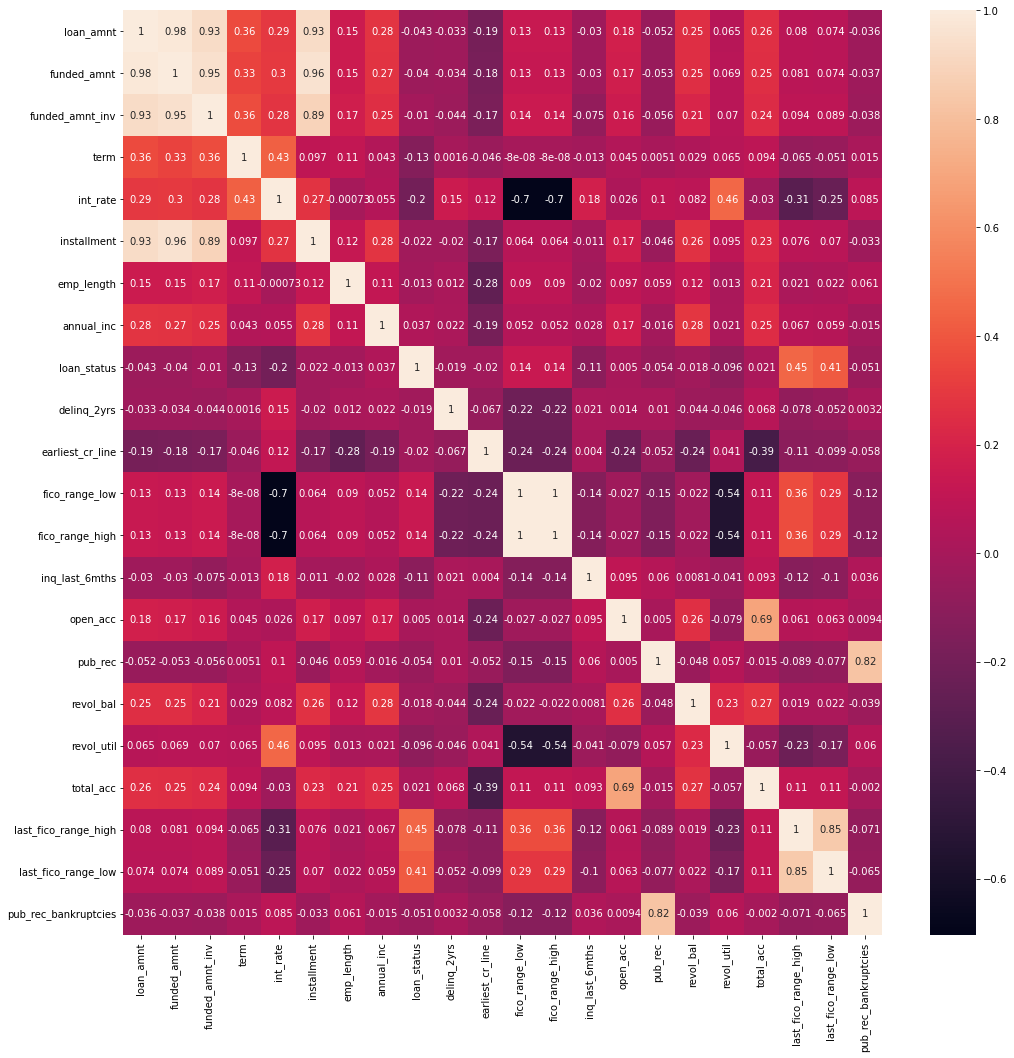

In [131]:
plt.figure(figsize = (17,17))
sns.heatmap(df_corr, annot=True)

In [132]:
# Analiza macierzy korealcji:
# - zmienną opisywaną jest zmienna loan_status,
# - kolumna w większości przypadków jest nieskorelowana (współczynnik korelacji w przybliżeniu równy 0)
# - istnieje jednak kilka kolumn, z którymi następuje korelacja dodatnia oraz ujemna:
# - korelacja dodatnia z kolumnami last_fico_range_high, last_fico_range_low, fico_range_high, fico_range_low. Poszczególne
# kolumny nie są jednak bardzo silnie ze sobą skorelowane. 
# - korelacja ujemna następuje z kolumnami inq_last_6mths, int_rate oraz term. 
# Dodatni współczynnik korelacji informuje, że wraz ze wzrostem jednej wartości zmiennej, rośnie również druga wartość. 
# Oznacza to, że w przypadku górnej i dolnej granicy wskaźnika FICO, wraz z ich wzrostem rośnie spłacalność kredytów.
# Wzorst wartości z kolumn int_rate(oprocentowanie pożyczki), inq_last_6mths (liczba zapytań), term (liczba spłat w msc) 
# oraz reoveries (zwroty) powodują zmniejszanie spłacalności kredytów. 
# Dzięki macierzy korelacji, jesteśmy w stanie poznać, które cechy najbardziej wpływają na zmienną opisywaną.

# Dodatkowo - możemy przeanalizować wpływ niektórych zmiennych między sobą - bardzo silnie skorelowane ze sobą zmienne 
# nie są przydatne dla naszego modelu - oznacza to, że opisują praktycznie to samo. Zmienne takie można usunąć bazując
# na pewnym zadanym progu korelacji - na przykład 0.85 lub 0.90. Idealnie obrazuje to przykład zmiennych loan_amnt
# oraz funded amount - korelacja wynosi aż 0.98 - można więc pozbyć się zmiennych, które są tak silnie skorelowane.

In [133]:
# Usuwamy silnie skorelowane cechy
high_corr = ['funded_amnt', 'funded_amnt_inv', 'installment', 'fico_range_high']

In [134]:
df_loan_noCorr = df_loan.drop(columns=high_corr)

In [135]:
# Podsumowując - pozostało 25 kolumn
df_loan_noCorr.head()

loan_amnt  term  int_rate sub_grade  emp_length home_ownership  annual_inc  \
0     5000.0  36.0     10.65        B2        10.0           RENT     24000.0   
1     2500.0  60.0     15.27        C4         1.0           RENT     30000.0   
2     2400.0  36.0     15.96        C5        10.0           RENT     12252.0   
3    10000.0  36.0     13.49        C1        10.0           RENT     49200.0   
4     3000.0  60.0     12.69        B5         1.0           RENT     80000.0   

  verification_status  loan_status         purpose  ... inq_last_6mths  \
0            Verified            1     credit_card  ...            1.0   
1     Source Verified            0             car  ...            5.0   
2        Not Verified            1  small_business  ...            2.0   
3     Source Verified            1           other  ...            1.0   
4     Source Verified            1           other  ...            0.0   

  open_acc  pub_rec  revol_bal  revol_util  total_acc  last_fico_range_high  \
0      3.0      0.0    13648.0        83.7        9.0                 739.0   
1      3.0      0.0     1687.0         9.4        4.0                 499.0   
2      2.0      0.0     2956.0        98.5       10.0                 739.0   
3     10.0      0.0     5598.0        21.0       37.0                 604.0   
4     15.0      0.0    27783.0        53.9       38.0                 684.0   

   last_fico_range_low  pub_rec_bankruptcies  debt_settlement_flag  
0                735.0                   0.0                     N  
1                  0.0                   0.0                     N  
2                735.0                   0.0                     N  
3                600.0                   0.0                     N  
4                680.0                   0.0                     N  

[5 rows x 25 columns]

3. Odpowiedź na 6 pytań z treści projektu:

In [136]:
# 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

In [137]:
# W celu określenia związku prawdopodobieństwa spłacenia pożyczki oraz wtniku FICO posłużymy się korelacją

In [138]:
# Istnieje pewna korelacja dodatnia - im większy fico_range_high (zakres górny) tym większa szansa na splatę
df_loan['fico_range_high'].corr(df_loan['loan_status'])

0.14160685670094728

In [139]:
df_loan['fico_range_low'].corr(df_loan['loan_status'])

0.14160685670094728

In [140]:
# Korelacja jest taka sama - dlatego w poprzednim punkcie usunęliśmy jedną z nadmiarowych kolumn (fico_range_high)

In [141]:
df_loan['last_fico_range_high'].corr(df_loan['loan_status'])

0.44968416261614425

In [142]:
df_loan['last_fico_range_low'].corr(df_loan['loan_status'])

0.40896519464081293

In [143]:
# Ze wskaźnikami last_fico_range_low oraz last_fico_range_high istnieje wysoka korelacja dodatnia. Wzrost wartości wskaźników
# powoduje wzrost szans na spłacenie pożyczki.  

In [144]:
# 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne 
# lub związane z wynikiem FICO

In [145]:
df_loan['earliest_cr_line'].corr(df_loan['loan_status'])

-0.01968252336618239

In [146]:
# Wiek kredytowy nie ma związku ze spłatą zobowiązania.

In [147]:
df_loan['earliest_cr_line'].corr(df_loan['last_fico_range_high'])

-0.1088677817804064

In [148]:
df_loan['earliest_cr_line'].corr(df_loan['last_fico_range_low'])

-0.09887037440856498

In [149]:
df_loan['earliest_cr_line'].corr(df_loan['fico_range_high'])

-0.23500458717064862

In [150]:
df_loan['earliest_cr_line'].corr(df_loan['fico_range_low'])

-0.23500458717064862

In [151]:
# Wskaźniki FICO (last nie są zbyt związane z wiekiem kredytowym - niska korelacja ujemna), natomiast zakresy - górny
# i dolny są silniej skorelowane (również ujemnie) - wraz ze wzrostem wieku kredytowego, zakresy FICO maleją (i odwrotnie).

In [152]:
# 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [153]:
# Musimy pozyskać dane na temat kredytu hipotecznego na dom. Umożliwia nam to kolumna home_ownership i wartości MORTGAGE 

In [154]:
mortage = df_loan['home_ownership'].apply(lambda data: 1 if data=='MORTGAGE' else 0)

In [155]:
mortage.corr(df_loan['loan_status'])

0.022158478929383756

In [156]:
# Bardzo słaba korelacja dodatnia -> nie ma związku.

In [157]:
df_plot = df_loan.groupby(['home_ownership', 'loan_status'])['loan_status'].count()

In [158]:
df_plot

home_ownership  loan_status
MORTGAGE        0               2691
                1              16242
NONE            0                  1
                1                  3
OTHER           0                 29
                1                105
OWN             0                493
                1               2747
RENT            0               3192
                1              16929
Name: loan_status, dtype: int64

In [159]:
df_plot = df_plot.unstack().fillna(0)

In [160]:
df_plot['total'] = df_plot[0].add(df_plot[1])

In [161]:
df_plot = df_plot.sort_values('total', ascending=False)

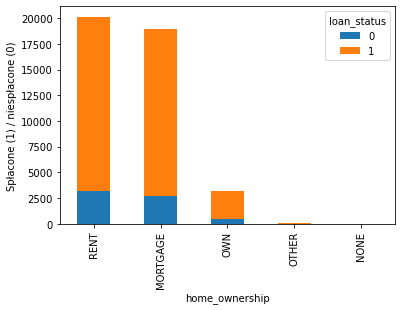

In [162]:
df_plot.iloc[:, :2].plot(kind='bar', stacked=True)
plt.ylabel('Spłacone (1) / niespłacone (0)')
plt.show()

In [163]:
# Widać, że najwięcej niespłaconych kredytów jest dla wynajmu oraz hipoteki. Są to również najczęściej wybierane typy (RENT,
# MORTGAGE)

In [164]:
# 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [165]:
# Obejrzyjmy fragment histogramu przedstawiający rozkład danych annual_inc. Widać, że większośc dochodów zaiwera się 
# w granicach 30-70 tysięcy. Różnorodność danych jest jednak spora. Można przypuszczać, że będzie mialo to związek 
# ze spłacalnością kredytu.

<AxesSubplot:>

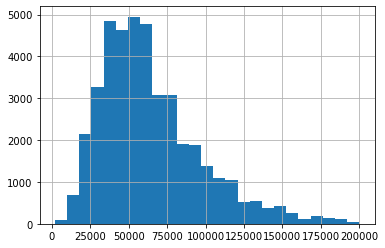

In [166]:
df_loan[df_loan['annual_inc']<200000]['annual_inc'].hist(bins=25)

In [167]:
# Sprawdźmy korelację w typowym zakresie dochodów

In [168]:
popular_inc = df_loan['annual_inc'].between(50000, 70000, inclusive=True)

C:\Users\Małgosia\AppData\Local\Temp\ipykernel_8600\1927588399.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  popular_inc = df_loan['annual_inc'].between(50000, 70000, inclusive=True)


In [169]:
df_loan[popular_inc]['annual_inc'].corr(df_loan[popular_inc]['loan_status'])

0.015077122633475722

In [170]:
# Obejrzyjmy jeszcze dane z wykorzystaniem box-plota

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

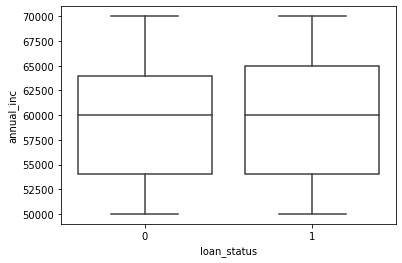

In [171]:
sns.boxplot(data=df_loan[popular_inc], y='annual_inc', x='loan_status', boxprops={'facecolor':'None'})

In [172]:
# W zadanym zakresie korelacja jest bardzo słaba. Nie ma to wpływu. Ciekawe jak w przypadku bardzo duzych dochodów

In [173]:
big_inc = df_loan['annual_inc'].between(150000, 6000000, inclusive=True)

C:\Users\Małgosia\AppData\Local\Temp\ipykernel_8600\2374904527.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  big_inc = df_loan['annual_inc'].between(150000, 6000000, inclusive=True)


In [174]:
df_loan[big_inc]['annual_inc'].corr(df_loan[big_inc]['loan_status'])

0.005158151796907233

In [175]:
# Tutaj również nie ma związku.

In [176]:
df_loan['loan_status'].corr(df_loan['annual_inc'])

0.03737240036612158

In [177]:
# Dla całej kolumny również. Wniosek - dochód nie wiąże się z wykonaniem zobowiązania.

In [178]:
# 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [179]:
# Za długość zatrudnienia odpowiada kolumna emp_length. Zerknijmy na jej zawartość

In [180]:
df_loan['emp_length'].value_counts()

10.000000    9363
1.000000     8611
2.000000     4736
3.000000     4358
4.000000     3638
5.000000     3451
6.000000     2369
7.000000     1871
8.000000     1589
9.000000     1338
5.049342     1108
Name: emp_length, dtype: int64

In [181]:
# Wyrysujmy histogram

<AxesSubplot:>

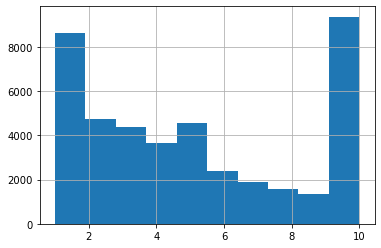

In [182]:
df_loan['emp_length'].hist()

In [183]:
# Najczęstsze wartości to 1 oraz 10. 

In [184]:
# Sprawdźmy korelację między zmiennymi 

In [185]:
df_loan['loan_status'].corr(df_loan['emp_length'])

-0.013312430729218052

In [186]:
# Korelacja jest minimalna - historia zatrudnienia nie wiąże się z prawdopodobieństwem wykonania/nie wykonania
# zobowiązania.

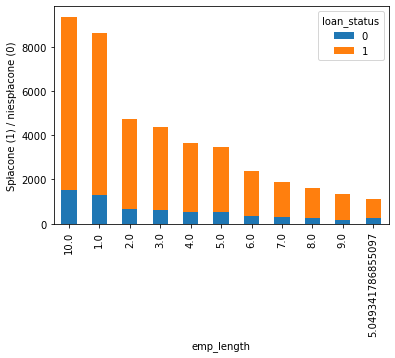

In [187]:
# Dokonajmy wizualizacji - jak wygląda rozkład spłacalności dla poszczególnych lat
df_emp_len = df_loan.groupby(['emp_length', 'loan_status'])['loan_status'].count()
df_emp_len = df_emp_len.unstack().fillna(0)
df_emp_len['total'] = df_emp_len[0].add(df_emp_len[1])
df_emp_len = df_emp_len.sort_values('total', ascending=False)
df_emp_len.iloc[:, :2].plot(kind='bar', stacked=True)
plt.ylabel('Spłacone (1) / niespłacone (0)')
plt.show()

In [188]:
# Można zauważyć, że zdecydowana większość kredytów jest spłacana. Jednakże - liczba niesłpaconych kredytów dla 
# 1 roku oraz 10 lat (kolor niebieski) - jest porównywalna, mimo większej liczby kredytów spłaconych dla 10 lat.

In [189]:
# 6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

In [190]:
# Wielkość żądanej pożyczki opisuje kolumna loan_amnt. Sprawdźmy statystyki dla tej kolumny

In [191]:
df_loan['loan_amnt'].describe()

count    42432.000000
mean     11103.857348
std       7411.018732
min        500.000000
25%       5200.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [192]:
# Miary opisujące rozkład danych pokazują, że istnieje spory rozrzut wartości (między minimalną - 500, a maksymalną - 35000)
# Średnia jest jednak na poziomie 11103 z odchyleniem standardowym 7411. 

In [193]:
# Sprawdźmy zatem korelację

In [194]:
df_loan['loan_status'].corr(df_loan['loan_amnt'])

-0.04304311904931977

In [195]:
# Z otrzymanej wartości korelacji wynika, że wielkośc pożyczki nei jest powiązana z wykonaniem zobowiązania.

In [196]:
# Na koniec obejrzyjmy jeszcze rozkład wartości na box plocie

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

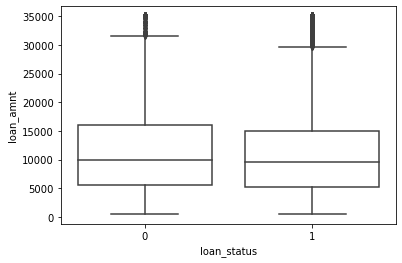

In [197]:
sns.boxplot(data=df_loan, y='loan_amnt', x='loan_status', boxprops={'facecolor':'None'})

In [198]:
# Box plot informuje nas o medianie, wartości maksymalnej i minimalnej oraz kwartylach dla poszczególnych statusów 
# kredytu (0 lub 1).

4. Dalsza, autorska eksploracja - rozbudowanie części projektu o Wasze pomysły, hipotezy i odkryte wcześniej rzeczy

In [199]:
# Na koniec przeprowadzimy test statytyczny

In [200]:
# Przeprowadźmy jeszcze test. 
# Hipoteza: Średnie wartości kredytów są takie same dla statusów 0 i 1
# Hipoteza alternatywna: Średnie wartości kredytów nie są takie same dla statusów 0 i 1
loan_amnt_0 = df_loan[df_loan['loan_status'] == 0]['loan_amnt']
loan_amnt_1 = df_loan[df_loan['loan_status'] == 1]['loan_amnt']

In [201]:
# Czy rozkłady normalne?
from scipy.stats import shapiro

print(shapiro(loan_amnt_0))
print(shapiro(loan_amnt_1))

ShapiroResult(statistic=0.9194213151931763, pvalue=0.0)
ShapiroResult(statistic=0.9116569757461548, pvalue=0.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [202]:
# Rozkłady są normalne - możemy wykonać test t.

In [203]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(loan_amnt_0, loan_amnt_1)
print('stat=%.3f, p_value=%.3f' % (stat, p))
if p > 0.05:
    print('Średnia taka sama, Hipoteza potwierdzona!')
else:
    print('Średnia różna! Hipoteza odrzucona, przyjmujemy alternatywną.')

stat=8.874, p_value=0.000
Średnia różna! Hipoteza odrzucona, przyjmujemy alternatywną.


In [204]:
# Przyjęta hipoteza alternatywna: Średnie wartości kredytów nie są takie same dla statusów 0 i 1

# Część 3 - feature engineering

In [205]:
# Rzut okiem na typy danych
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42432 entries, 0 to 42431
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42432 non-null  float64
 1   funded_amnt           42432 non-null  float64
 2   funded_amnt_inv       42432 non-null  float64
 3   term                  42432 non-null  float64
 4   int_rate              42432 non-null  float64
 5   installment           42432 non-null  float64
 6   sub_grade             42432 non-null  object 
 7   emp_length            42432 non-null  float64
 8   home_ownership        42432 non-null  object 
 9   annual_inc            42432 non-null  float64
 10  verification_status   42432 non-null  object 
 11  loan_status           42432 non-null  int64  
 12  purpose               42432 non-null  object 
 13  title                 42432 non-null  object 
 14  addr_state            42432 non-null  object 
 15  delinq_2yrs        

In [206]:
# W wielu przypadkach mamy już floaty / inty co jak najbardziej spełnia nasze oczekiwania. W niektórych jednak znajdują się
# dane typu object - na przykład kolumna 'sub_grade'

In [207]:
# Wypiszmy te kolumny, które są typu object
col_types = df_loan.dtypes
for col_no, col_type in enumerate(col_types):
    if(col_type == 'object'):
        print(df_loan.columns[col_no], "-", col_type)

sub_grade - object
home_ownership - object
verification_status - object
purpose - object
title - object
addr_state - object
debt_settlement_flag - object


In [208]:
# Mamy 7 takich kolumn. Musimy zastanowic się, co zrobić z każdą z nich. Poniżej analiza kolejnych kolumn

In [209]:
# Kolumna sub_grade

In [210]:
df_loan['sub_grade'].value_counts()

B3    2994
A4    2904
B5    2803
A5    2790
B4    2584
C1    2259
C2    2150
B2    2110
B1    1881
A3    1818
C3    1654
A2    1517
D2    1481
C4    1366
D3    1317
C5    1287
A1    1141
D4    1138
D1    1047
D5    1010
E1     884
E2     788
E3     663
E4     552
E5     492
F1     391
F2     306
F3     235
F4     208
F5     153
G1     139
G2     106
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

In [211]:
# Istnieje możliwość konwersji sub_grades na wartości numeryczne np. A1- 1, A2 - 2 itd, jednak nie jesteśmy pewni czy 
# nie wpłynie to negatywnie na "wartościowanie" poszczególnych sub_grades. Inna możlwiość to redukcja np. A1->A, B3->B,
# jednak wówczas duża część potencjalnie pożądanych informacji może zostać utracona. 
# Aktualnie najlepszym pomysłem wydaje się wykonanie one hot encode na tak wyglądającej ramce.

In [212]:
# Zapamiętujemy kolumnę do one_hot_encode i wykonamy je na końcu po zbiorczej analizie dla wszysktich wybranych.

In [213]:
# Kolumna home_ownership

In [214]:
df_loan['home_ownership'].value_counts()

RENT        20121
MORTGAGE    18933
OWN          3240
OTHER         134
NONE            4
Name: home_ownership, dtype: int64

In [215]:
# Kolumna idealnie nadaje się do one-hot-encode. Mamy tylko 5 typów - typ NONE zawiera jedynie 4 wartości, więc aby nie 
# wstawiać dodatkowej kolumny w one-hot-encode -> zamienimy wartości z None na najbardziej popularne - RENT.

In [216]:
df_loan['home_ownership'] = df_loan['home_ownership'].apply(lambda data: data.replace("NONE", "RENT") if(data=="NONE") else data)

In [217]:
df_loan['home_ownership'].value_counts()

RENT        20125
MORTGAGE    18933
OWN          3240
OTHER         134
Name: home_ownership, dtype: int64

In [218]:
# Liczba kolumn po one-hot-encode zostanie zredukowana z 5 do 4.

In [219]:
# Kolumna verification_status

In [220]:
df_loan['verification_status'].head()

0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object

In [221]:
df_loan['verification_status'].value_counts()

Not Verified       18685
Verified           13457
Source Verified    10290
Name: verification_status, dtype: int64

In [222]:
# Widać, że mamy tutaj trzy różne wartości. Zredukujemy je do dwóch i zastąpimy odpowiednio 0 (Not Verified) oraz
# 1 (Verified lub Source Verified)

In [223]:
def replace_verification(data):
    if('Not' in data):
        return 0
    else:
        return 1

In [224]:
df_loan['verification_status'] = df_loan['verification_status'].apply(lambda data: replace_verification(data))

In [225]:
df_loan['verification_status'].value_counts()

1    23747
0    18685
Name: verification_status, dtype: int64

In [226]:
# Jak widać - odpowiednie wartości zostały zastąpione 0 i 1.

In [227]:
# Kolumna purpose

In [228]:
df_loan['purpose'].value_counts()

debt_consolidation    19756
credit_card            5472
other                  4380
home_improvement       3194
major_purchase         2303
small_business         1989
car                    1611
wedding                1003
medical                 751
moving                  626
house                   425
educational             417
vacation                399
renewable_energy        106
Name: purpose, dtype: int64

In [229]:
# Kolumna nadaje się jedynie do przekształcenia z wykorzystaniem one-hot-encode.

In [230]:
# Kolumna title (tworzenie nowej cechy)

In [231]:
df_loan['title'].value_counts()

Debt Consolidation         2257
Debt Consolidation Loan    1759
Personal Loan               708
Consolidation               546
debt consolidation          532
                           ... 
Our Wedding 5/7/11            1
Springs                       1
Bob's Loan                    1
To Hell With Dept             1
VISA                          1
Name: title, Length: 21211, dtype: int64

In [232]:
# Kolumna ma za dużo unikalnych wartości do one-hot-encode! Możemy tutaj utworzyć na jej bazie nową cechę, którą będzie 
# długość tytułu. 

In [233]:
df_loan['title_len'] = df_loan['title'].apply(lambda data: len(data))

In [234]:
df_loan = df_loan.drop(columns=['title'])

In [235]:
df_loan.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0     5000.0       5000.0           4975.0  36.0     10.65       162.87   
1     2500.0       2500.0           2500.0  60.0     15.27        59.83   
2     2400.0       2400.0           2400.0  36.0     15.96        84.33   
3    10000.0      10000.0          10000.0  36.0     13.49       339.31   
4     3000.0       3000.0           3000.0  60.0     12.69        67.79   

  sub_grade  emp_length home_ownership  annual_inc  ...  open_acc  pub_rec  \
0        B2        10.0           RENT     24000.0  ...       3.0      0.0   
1        C4         1.0           RENT     30000.0  ...       3.0      0.0   
2        C5        10.0           RENT     12252.0  ...       2.0      0.0   
3        C1        10.0           RENT     49200.0  ...      10.0      0.0   
4        B5         1.0           RENT     80000.0  ...      15.0      0.0   

  revol_bal revol_util  total_acc  last_fico_range_high  last_fico_range_low  \
0   13648.0       83.7        9.0                 739.0                735.0   
1    1687.0        9.4        4.0                 499.0                  0.0   
2    2956.0       98.5       10.0                 739.0                735.0   
3    5598.0       21.0       37.0                 604.0                600.0   
4   27783.0       53.9       38.0                 684.0                680.0   

   pub_rec_bankruptcies  debt_settlement_flag  title_len  
0                   0.0                     N          8  
1                   0.0                     N          4  
2                   0.0                     N         20  
3                   0.0                     N          8  
4                   0.0                     N          8  

[5 rows x 29 columns]

In [236]:
# Dokonano więc zamiany - dodano kolumnę title_len opisującą długość tytułu (wartości numeryczne), a usunięto title (tytuł).

In [237]:
# Kolumna addr_state

In [238]:
df_loan['addr_state'].value_counts()

CA    7421
NY    4054
FL    3098
TX    2906
NJ    1979
IL    1670
PA    1645
GA    1502
VA    1485
MA    1432
OH    1323
MD    1123
AZ     928
WA     887
CO     855
NC     829
CT     813
MI     795
MO     761
MN     649
NV     526
WI     515
SC     489
AL     483
OR     467
LA     460
KY     358
OK     316
KS     296
UT     278
AR     260
DC     222
RI     208
NM     205
NH     188
WV     187
HI     180
DE     135
MT      96
WY      87
AK      86
SD      66
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

In [239]:
# Kolumna ma dużo wartości, jednak spróbujemy dokonać na niej one-hot-encodingu. Jeżeli wyniki nie będą satysfakcjonujące,
# kolumna zostanie usunięta. Teoretycznie można dokonać tutaj redukcji unikalnych wartości na przykład poprzez podział 
# odpowiednich stanów na północ/południe kraju, jednak póki co nie zdecydowałam się na taki wybór.

In [240]:
# Kolumna debt_settlement_flag

In [241]:
df_loan['debt_settlement_flag'].value_counts()

N    42272
Y      160
Name: debt_settlement_flag, dtype: int64

In [242]:
# W przypadku kolumny debt_settlement_flag mamy wartości Y oraz N (yes/no). Zamienimy je następująco Y->1, N->0

In [243]:
df_loan['debt_settlement_flag'] = df_loan['debt_settlement_flag'].apply(lambda data: 1 if data=='Y' else 0)

In [244]:
df_loan['debt_settlement_flag'].value_counts()

0    42272
1      160
Name: debt_settlement_flag, dtype: int64

In [245]:
# Widać tutaj dużą przewagę '0', jednak kolumnę pozostawiamy.

In [246]:
# One-hot-encoding dla wybranych kolumn

In [247]:
# Zobaczmy typy przed
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42432 entries, 0 to 42431
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42432 non-null  float64
 1   funded_amnt           42432 non-null  float64
 2   funded_amnt_inv       42432 non-null  float64
 3   term                  42432 non-null  float64
 4   int_rate              42432 non-null  float64
 5   installment           42432 non-null  float64
 6   sub_grade             42432 non-null  object 
 7   emp_length            42432 non-null  float64
 8   home_ownership        42432 non-null  object 
 9   annual_inc            42432 non-null  float64
 10  verification_status   42432 non-null  int64  
 11  loan_status           42432 non-null  int64  
 12  purpose               42432 non-null  object 
 13  addr_state            42432 non-null  object 
 14  delinq_2yrs           42432 non-null  float64
 15  earliest_cr_line   

In [248]:
# A więc stosujemy tak zwane One-hot-encode dla wybranych wcześniej kolumn (wyjasnienia w komentarzach powyżej)
one_hot_df = pd.get_dummies(df_loan, columns=['sub_grade', 'home_ownership', 'addr_state', 'purpose'])

In [249]:
# Podgląd danych
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42432 entries, 0 to 42431
Columns: 128 entries, loan_amnt to purpose_wedding
dtypes: float64(20), int64(5), uint8(103)
memory usage: 12.3 MB


In [250]:
# Wszystko się zgadza - wszystkie kolumny zawierają wartości numeryczne. Możemy przejść do zapisu danych w pliku csv 
# oraz do części 4 projektu. 

In [251]:
# Wyświetlmy jeszcze opis ramki - jak widać, składa się ona z 124 kolumn - zostało więc utworzone blisko 100 nowych cech.
one_hot_df.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  42432.000000  42432.000000     42432.000000  42432.000000   
mean   11103.857348  10835.376603     10156.500734     42.217760   
std     7411.018732   7147.055659      7130.140316     10.515147   
min      500.000000    500.000000         0.000000     36.000000   
25%     5200.000000   5075.000000      4950.000000     36.000000   
50%     9800.000000   9600.000000      8500.000000     36.000000   
75%    15000.000000  15000.000000     14000.000000     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc  \
count  42432.000000  42432.000000  42432.000000  4.243200e+04   
mean      12.161955    323.003033      5.049342  6.917304e+04   
std        3.707475    208.941527      3.366928  6.409646e+04   
min        5.420000     15.670000      1.000000  1.896000e+03   
25%        9.630000    165.740000      2.000000  4.000000e+04   
50%       11.990000    278.195000      4.000000  5.900000e+04   
75%       14.720000    428.677500      9.000000  8.250000e+04   
max       24.590000   1305.190000     10.000000  6.000000e+06   

       verification_status   loan_status  ...  purpose_home_improvement  \
count         42432.000000  42432.000000  ...              42432.000000   
mean              0.559648      0.849029  ...                  0.075273   
std               0.496435      0.358025  ...                  0.263835   
min               0.000000      0.000000  ...                  0.000000   
25%               0.000000      1.000000  ...                  0.000000   
50%               1.000000      1.000000  ...                  0.000000   
75%               1.000000      1.000000  ...                  0.000000   
max               1.000000      1.000000  ...                  1.000000   

       purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
count   42432.000000            42432.000000     42432.000000    42432.000000   
mean        0.010016                0.054275         0.017699        0.014753   
std         0.099579                0.226562         0.131856        0.120564   
min         0.000000                0.000000         0.000000        0.000000   
25%         0.000000                0.000000         0.000000        0.000000   
50%         0.000000                0.000000         0.000000        0.000000   
75%         0.000000                0.000000         0.000000        0.000000   
max         1.000000                1.000000         1.000000        1.000000   

       purpose_other  purpose_renewable_energy  purpose_small_business  \
count   42432.000000              42432.000000            42432.000000   
mean        0.103224                  0.002498                0.046875   
std         0.304255                  0.049919                0.211374   
min         0.000000                  0.000000                0.000000   
25%         0.000000                  0.000000                0.000000   
50%         0.000000                  0.000000                0.000000   
75%         0.000000                  0.000000                0.000000   
max         1.000000                  1.000000                1.000000   

       purpose_vacation  purpose_wedding  
count      42432.000000     42432.000000  
mean           0.009403         0.023638  
std            0.096515         0.151920  
min            0.000000         0.000000  
25%            0.000000         0.000000  
50%            0.000000         0.000000  
75%            0.000000         0.000000  
max            1.000000         1.000000  

[8 rows x 128 columns]

In [252]:
df_loan = one_hot_df

# Część 4 - Modelowanie

In [253]:
# Klasteryzacja

In [254]:
# Pobieramy wartości z ramki danych. Jako zmienna opisywana wybrana jest kolumna loan_status. Pozostałe kolumny, to kolumny
# opisujące.
X = df_loan.drop(columns=['loan_status']).values
Y = df_loan['loan_status'].values

In [255]:
# Skalowanie danych

In [256]:
# Z racji wykorzystania klasteryzacji (bazowanie na odległościach) musimy dane przeskalować, aby te o "większych 
# odległościach" nie wprowadziły zakłóceń

In [257]:
# Wykorzystamy min-maxa
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_clusters = min_max_scaler.fit_transform(X)

In [258]:
# Algorytm k-średnich (K-Means)

In [259]:
from sklearn.cluster import KMeans

In [260]:
# Sprawdzenie działania dla maksymalnie 20 klastrów. Dodajemy do listy sumy kwadratów odległości próbek do najbliższych 
# klastrów

sum_sqr_distances = []
# Rozpatrujemy maksymalnie 20 klastrów
clusters = 21
for cluster_no in range(1, clusters):
    K_mean = KMeans(n_clusters=cluster_no)
    K_mean.fit(X_clusters)
    sum_sqr_distances.append(K_mean.inertia_)

Text(0.5, 1.0, 'Plot for elbow method')

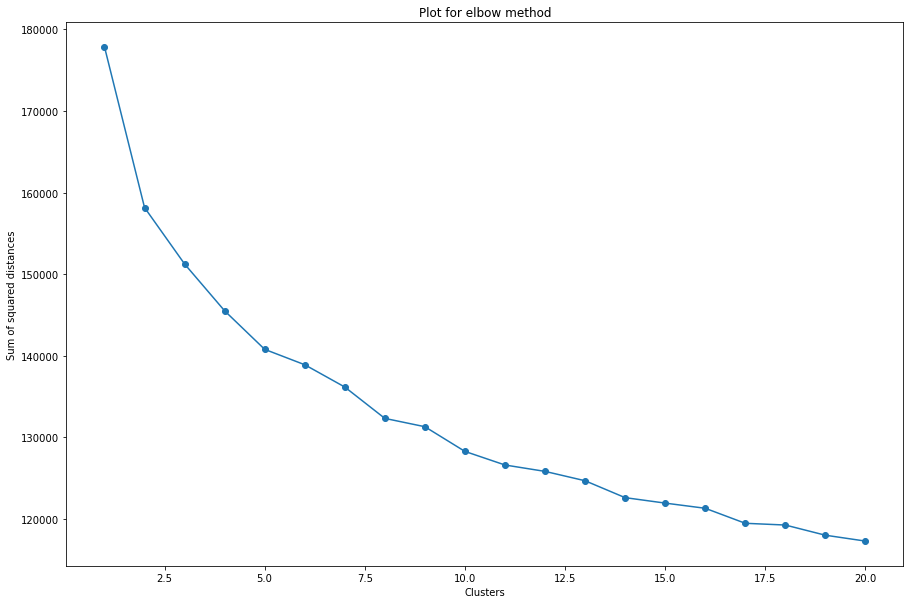

In [261]:
# Wykorzystajmy metodę łokcia (potrzebny wykres)
import matplotlib.pylab as plt
plt.figure(figsize=(15, 10))
plt.plot(list(range(1, clusters)), sum_sqr_distances, '-o')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Plot for elbow method')

In [262]:
# Z powyższego wykresu można zaobserwować, że "łokieć" znajduje się w miejscu odpowiadającym 8 klastrom. Jest to więc 
# optymalna liczba.

In [263]:
# Utwórzmy więc model z 8 klastrami
K_mean = KMeans(n_clusters=8)
K_mean.fit(X_clusters)

KMeans()

In [264]:
# Analiza klastrów

In [265]:
labels = pd.DataFrame(K_mean.labels_)
labeledData = pd.concat((df_loan, labels), axis = 1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [266]:
# Mamy 8 klastrów - każdy przechowuje dane o pewnej liczności
labeledData['labels'].value_counts()

3    8422
4    7709
5    6598
7    4788
2    4600
1    4056
0    3233
6    3026
Name: labels, dtype: int64

In [267]:
# Sprawdźmy, jaka jest zawartość poszczególnych klastrów
for cluster_no in range(8):
    print("Cluster "+str(cluster_no))
    print(labeledData[labeledData['labels']==cluster_no]['loan_status'].value_counts())

Cluster 0
1    2742
0     491
Name: loan_status, dtype: int64
Cluster 1
1    2988
0    1068
Name: loan_status, dtype: int64
Cluster 2
1    3629
0     971
Name: loan_status, dtype: int64
Cluster 3
1    7246
0    1176
Name: loan_status, dtype: int64
Cluster 4
1    6747
0     962
Name: loan_status, dtype: int64
Cluster 5
1    5919
0     679
Name: loan_status, dtype: int64
Cluster 6
1    2597
0     429
Name: loan_status, dtype: int64
Cluster 7
1    4158
0     630
Name: loan_status, dtype: int64


In [268]:
# Kmeans dokonuje podziału danych na okreslone grupy (8), zawierające informacje o kredytach. Łatwo zauważyć, że w każdym
# z klastrów znajdują się klienci spłacający/ nie spłacający pożyczki. Oznacza to możlwiość wyróżnienia (profilowania)
# w tym przypadku 8 róznych typów klientów. Dokładniejsze informacje da analiza statystyczna każdego z klastrów.

In [269]:
# W celu porównania danych z każdego z klastrów wypiszemy statystyki i zapoznamy się z nimi

In [270]:
cluster_desc = []
for cluster_no in range(8):
    print("Cluster "+str(cluster_no))
    desc = labeledData[labeledData['labels']==cluster_no].describe()
    cluster_desc.append(desc)
    print(desc)

Cluster 0
          loan_amnt   funded_amnt  funded_amnt_inv         term     int_rate  \
count   3233.000000   3233.000000      3233.000000  3233.000000  3233.000000   
mean   10149.605629   9941.254253      9378.326383    41.760594    11.900616   
std     6980.195865   6763.666568      6710.159764    10.251942     3.701971   
min      700.000000    700.000000         0.000000    36.000000     5.420000   
25%     5000.000000   5000.000000      4500.000000    36.000000     8.900000   
50%     8000.000000   8000.000000      7750.000000    36.000000    11.830000   
75%    14000.000000  14000.000000     12900.000000    36.000000    14.350000   
max    35000.000000  35000.000000     35000.000000    60.000000    23.590000   

       installment   emp_length    annual_inc  verification_status  \
count  3233.000000  3233.000000  3.233000e+03          3233.000000   
mean    298.258082     5.325674  5.903136e+04             0.500464   
std     201.940478     3.368537  4.930202e+04             0

          loan_amnt   funded_amnt  funded_amnt_inv         term     int_rate  \
count   8422.000000   8422.000000      8422.000000  8422.000000  8422.000000   
mean    7631.937188   7544.502493      6830.238252    36.718119    11.468728   
std     5456.860228   5363.441200      5221.632758     4.089150     3.145194   
min      500.000000    500.000000         0.000000    36.000000     5.420000   
25%     3800.000000   3700.000000      3000.000000    36.000000     8.940000   
50%     6000.000000   6000.000000      5500.000000    36.000000    11.490000   
75%    10000.000000  10000.000000      9475.000000    36.000000    13.790000   
max    35000.000000  35000.000000     35000.000000    60.000000    22.060000   

       installment   emp_length     annual_inc  verification_status  \
count  8422.000000  8422.000000    8422.000000          8422.000000   
mean    247.464491     3.849711   55182.864936             0.450368   
std     180.376930     2.988574   41094.899741             0.49756

          loan_amnt   funded_amnt  funded_amnt_inv         term     int_rate  \
count   3026.000000   3026.000000      3026.000000  3026.000000  3026.000000   
mean   10357.385988  10155.931923      9116.395142    40.235294    11.508351   
std     5229.038197   5128.323587      5177.380036     9.150793     3.407707   
min      800.000000    800.000000         0.000000    36.000000     5.420000   
25%     6000.000000   6000.000000      5119.990000    36.000000     8.600000   
50%    10000.000000  10000.000000      8500.000000    36.000000    11.480000   
75%    14000.000000  13500.000000     12000.000000    36.000000    13.920000   
max    35000.000000  35000.000000     35000.000000    60.000000    23.220000   

       installment   emp_length    annual_inc  verification_status  \
count  3026.000000  3026.000000  3.026000e+03               3026.0   
mean    314.940116     5.784954  7.067800e+04                  0.0   
std     169.969182     3.352593  5.665615e+04                  0.0   

In [271]:
# Danych jest dużo, skupmy się na przykład na średniej i zwizualizujmy średnią dla kilku cech 

In [272]:
cols_to_compare = cluster_desc[0].columns[0:22]
param_name = 'mean' # std

C:\Users\Małgosia\AppData\Local\Temp\ipykernel_8600\208512219.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


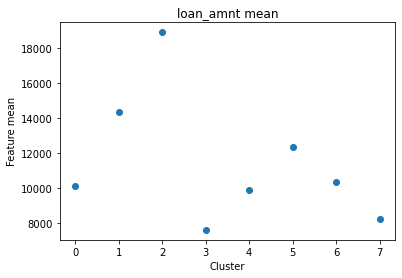

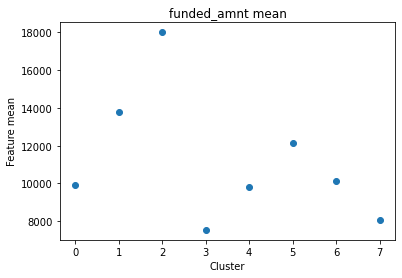

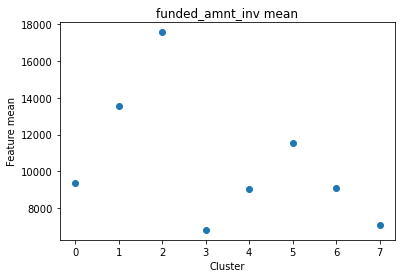

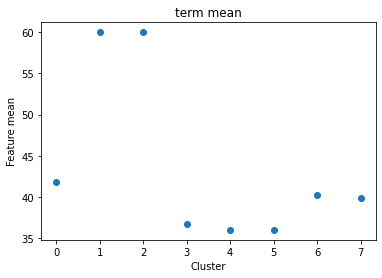

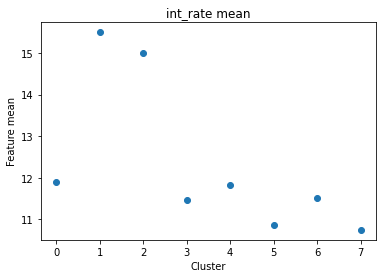

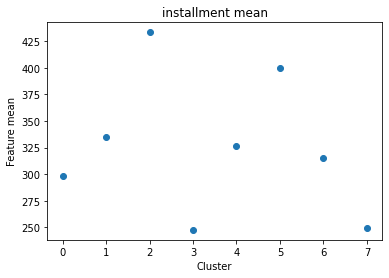

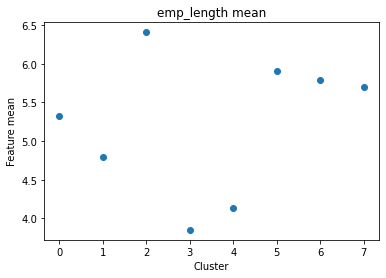

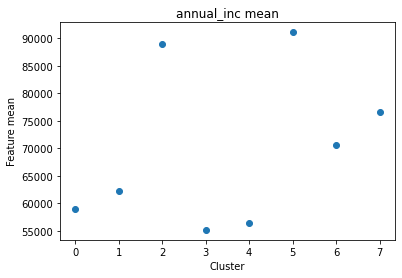

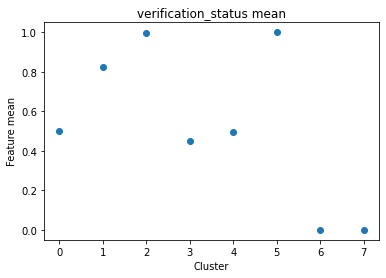

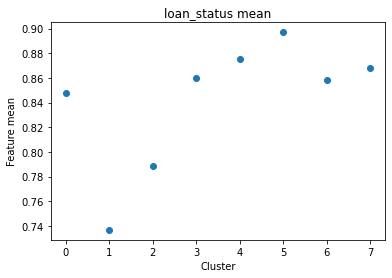

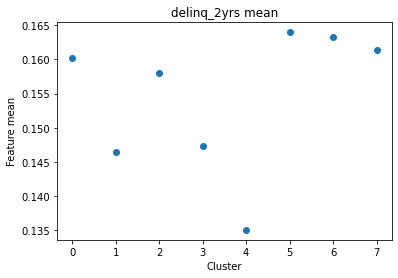

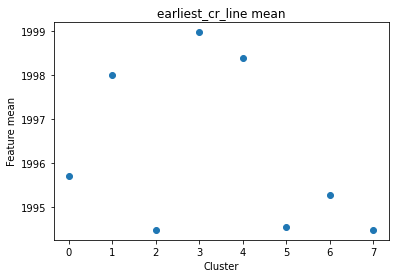

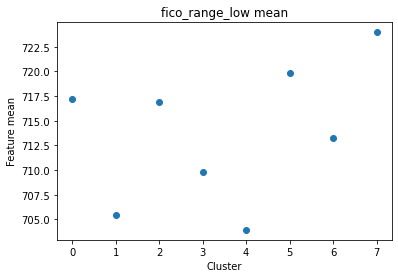

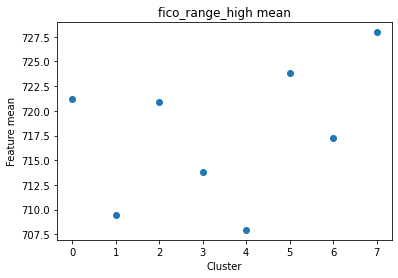

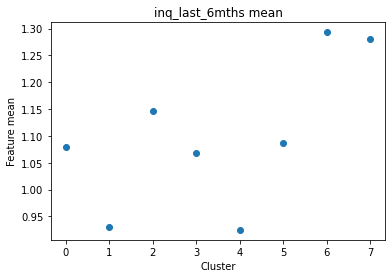

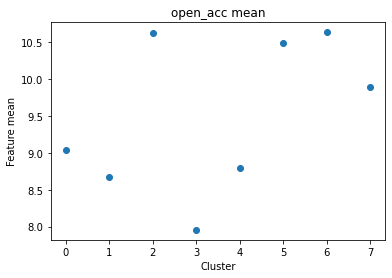

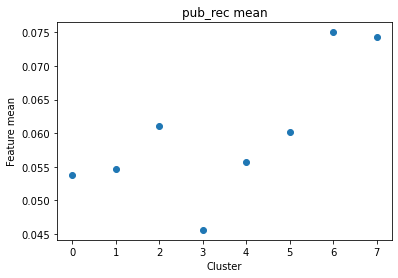

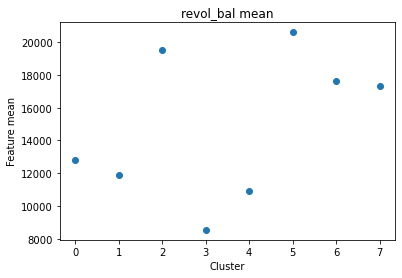

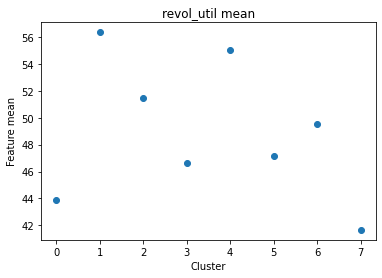

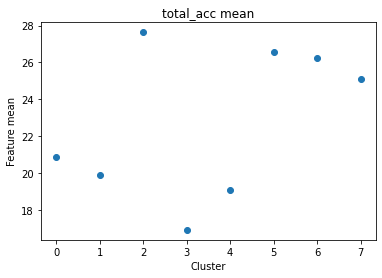

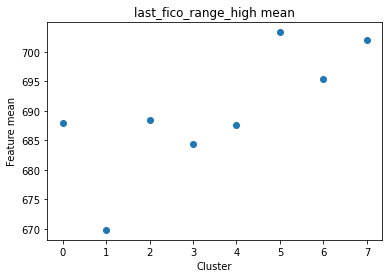

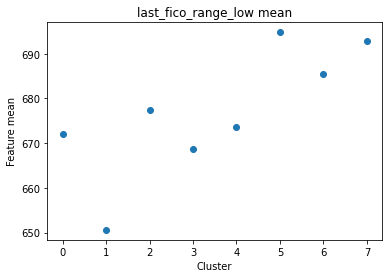

In [273]:
for col_to_comp in cols_to_compare:
    plt.figure()
    param_list = [cluster_description[col_to_comp][param_name] for cluster_description in cluster_desc]
    plt.scatter(list(range(len(param_list))), param_list)
    plt.xlabel('Cluster')
    plt.ylabel('Feature '+param_name)
    plt.title(col_to_comp + ' ' + param_name)

In [274]:
# Dzięki otrzymanym wykresom możemy porównać poszczególne klastry bazując na poszczególnych cechach - przykładowo: 
# klastry 5 oraz 7 odznaczają sie brakiem (0) verification_status (niezweryfikowane), jednak różnią się znacząco 
# w zakresie przedziałów FICO. Klastry 1 i 4 natotmiast - odznaczają się obecnością (1) verification_status.
# Dzięki przeglądowi powyższych wykresów jesteśmy w stanie opisać każdy z klastrów oraz 
# podać różnice między nimi. Przykładowo - zdecydowanie najdłuższe opisy oraz najmniejsza wartość FICO (range_low) wyróżniana
# jest dla klastra 5. Klaster ten, charakteryzuje się również bardzo niskimi rocznymi przychodami (annual_inc).
# Może to świadczyć o niezbyt zamożnej grupie kredytobiorców.

# Patrząc na wykres spłacalności (loan_status) można zauważyć, że spłacalność różni się w wzależności od klastra. 
# Najbardziej spłacalni pożyczkobiorcy zostali zakwalifikowani do klastra 4, 5, 7 (nawet około 90%!)
# Klaster 3 zawiera klientów wykazujących się najmniejszą spłacalnością. Pozostałe klastry osiągają podobne do siebie 
# wartości średnie.

In [275]:
# Klasteryzacja Hiererchiczna

In [276]:
import scipy.cluster.hierarchy as shc

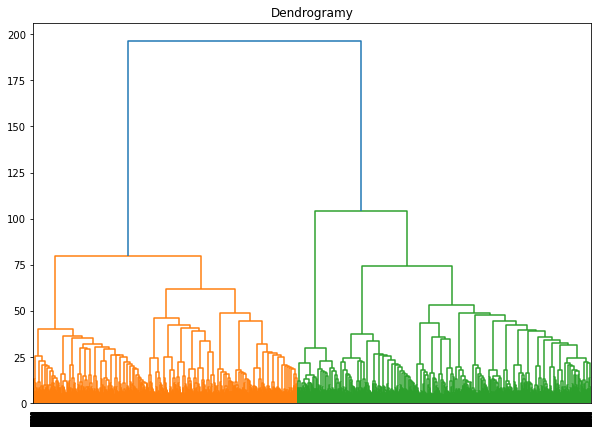

In [277]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogramy")  
dendrograms = shc.dendrogram(shc.linkage(X_clusters, method='ward'))

In [278]:
# Na podstawie obserwacji dendrogramu, ustalamy próg na 125 - linie pionowe są wówcza najdłuższe (odległości euklidesowe)
# Otrzymujemy wówczas 2 klastry.

In [279]:
# Podział na dwa klastry
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_clusters)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [280]:
labels_hier = pd.DataFrame(cluster.labels_)
labeledDataHier = pd.concat((df_loan, labels_hier), axis = 1)
labeledDataHier = labeledDataHier.rename({0:'labels'},axis=1)

In [281]:
# Sprawdźmy, jaka jest zawartość poszczególnych klastrów
for cluster_no in range(2):
    print("Cluster "+str(cluster_no))
    print(labeledDataHier[labeledDataHier['labels']==cluster_no]['loan_status'].value_counts())

Cluster 0
1    19116
0     3199
Name: loan_status, dtype: int64
Cluster 1
1    16910
0     3207
Name: loan_status, dtype: int64


In [282]:
# Klastry są dość zbalansowane - w obu wustepują podobne liczy kredytów spłacanych i niespłacanych. 

In [283]:
# Zobaczmy przykładowy wykres

In [284]:
cluster_cols = list(df_loan.columns)

In [285]:
del cluster_cols[6]

In [286]:
X_clusters_df = pd.DataFrame(min_max_scaler.fit_transform(df_loan.drop(columns=['loan_status'])), columns=cluster_cols)

In [287]:
X_clusters_df

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0       0.130435     0.130435         0.142143   0.0  0.272822     0.114151   
1       0.057971     0.057971         0.071429   1.0  0.513824     0.034245   
2       0.055072     0.055072         0.068571   0.0  0.549817     0.053245   
3       0.275362     0.275362         0.285714   0.0  0.420970     0.250977   
4       0.072464     0.072464         0.085714   1.0  0.379238     0.040418   
...          ...          ...              ...   ...       ...          ...   
42427   0.159420     0.159420         0.034286   0.0  0.401669     0.144891   
42428   0.275362     0.275362         0.010000   0.0  0.484090     0.255529   
42429   0.043478     0.043478         0.036429   0.0  0.088680     0.035827   
42430   0.159420     0.159420         0.018571   0.0  0.269692     0.139284   
42431   0.113043     0.113043         0.040000   0.0  0.220136     0.097385   

       annual_inc  verification_status  loan_status  delinq_2yrs  ...  \
0        1.000000             0.003685          1.0     0.000000  ...   
1        0.000000             0.004685          1.0     0.000000  ...   
2        1.000000             0.001727          0.0     0.000000  ...   
3        1.000000             0.007886          1.0     0.000000  ...   
4        0.000000             0.013021          1.0     0.000000  ...   
...           ...                  ...          ...          ...  ...   
42427    0.111111             0.001685          0.0     0.000000  ...   
42428    0.000000             0.008020          0.0     0.153846  ...   
42429    0.666667             0.024692          0.0     0.000000  ...   
42430    0.000000             0.003018          0.0     0.000000  ...   
42431    0.111111             0.004685          0.0     0.000000  ...   

       purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                           0.0            0.0                     0.0   
1                           0.0            0.0                     0.0   
2                           0.0            0.0                     0.0   
3                           0.0            0.0                     0.0   
4                           0.0            0.0                     0.0   
...                         ...            ...                     ...   
42427                       0.0            0.0                     0.0   
42428                       0.0            0.0                     0.0   
42429                       0.0            0.0                     0.0   
42430                       0.0            0.0                     0.0   
42431                       0.0            0.0                     0.0   

       purpose_medical  purpose_moving  purpose_other  \
0                  0.0             0.0            0.0   
1                  0.0             0.0            0.0   
2                  0.0             0.0            0.0   
3                  0.0             0.0            1.0   
4                  0.0             0.0            1.0   
...                ...             ...            ...   
42427              0.0             0.0            0.0   
42428              0.0             0.0            0.0   
42429              0.0             0.0            0.0   
42430              0.0             0.0            0.0   
42431              0.0             0.0            0.0   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                           0.0                     0.0               0.0   
1                           0.0                     0.0               0.0   
2                           0.0                     1.0               0.0   
3                           0.0                     0.0               0.0   
4                           0.0                     0.0               0.0   
...                         ...                     ...               ...   
42427                       0.0                     0.0             

Text(0, 0.5, 'total_acc')

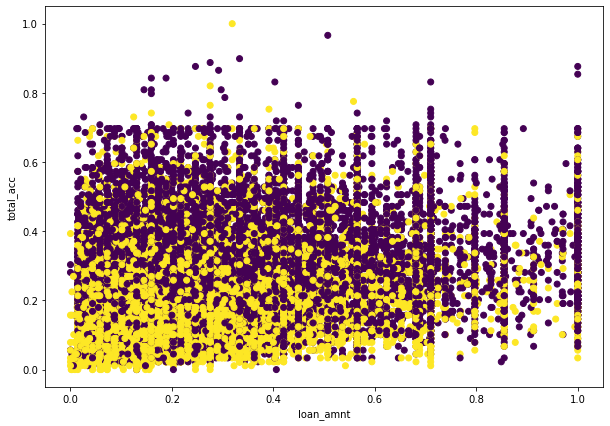

In [288]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_clusters_df['loan_amnt'], X_clusters_df['total_acc'], c=cluster.labels_) 
plt.xlabel('loan_amnt')
plt.ylabel('total_acc')

In [289]:
# Klastry można odróżnić między sobą po liczbie kredytów (total_acc). Do jednego klastra przyporządkowano kredyty 
# o małym wskaźniku total_acc, natomiast do drugiego - o wysokim. Jest to jedynie przykładowa interpretacja.

In [290]:
# Na koniec wygenerujmy opis klastrów
cluster_desc_hier = []
for cluster_no in range(2):
    print("Cluster "+str(cluster_no))
    desc = labeledDataHier[labeledDataHier['labels']==cluster_no].describe()
    cluster_desc_hier.append(desc)
    print(desc)

Cluster 0
          loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  22315.000000  22315.000000     22315.000000  22315.000000   
mean   12235.897378  11895.156845     11184.373418     43.193009   
std     7897.991716   7606.011179      7584.556540     10.995374   
min      500.000000    500.000000         0.000000     36.000000   
25%     6000.000000   6000.000000      5200.000000     36.000000   
50%    10000.000000  10000.000000      9825.607069     36.000000   
75%    16000.000000  16000.000000     15000.000000     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc  \
count  22315.000000  22315.000000  22315.000000  2.231500e+04   
mean      11.944363    348.401887      5.862225  8.003244e+04   
std        3.843423    220.211360      3.394256  7.625488e+04   
min        5.420000     15.750000      1.000000  4.800000e+03   
25%        8.880000    180.960000      3.000000  4.8

In [291]:
# Wybrane kolumny
cols_to_compare = cluster_desc_hier[0].columns[0:22]
param_name = 'mean' # std

C:\Users\Małgosia\AppData\Local\Temp\ipykernel_8600\2001626005.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


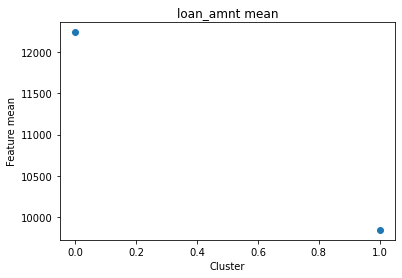

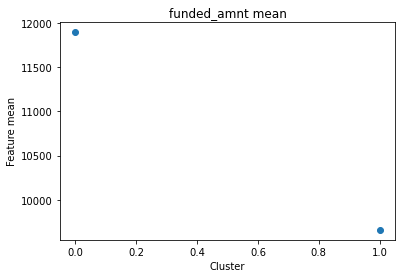

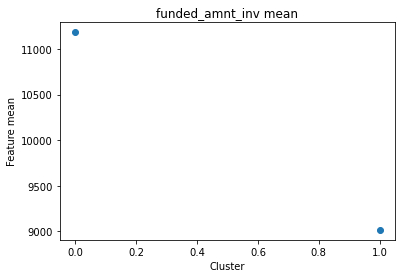

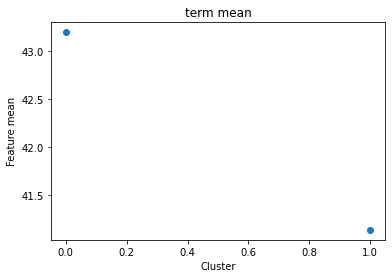

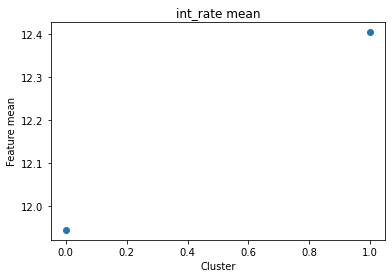

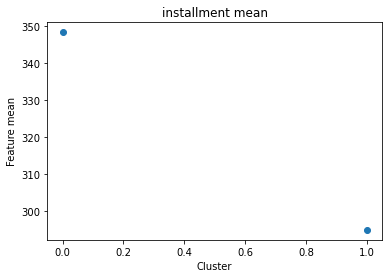

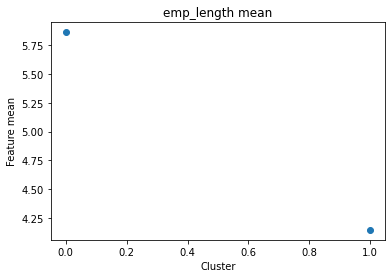

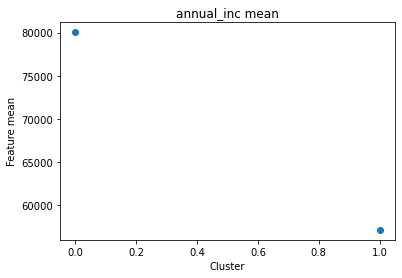

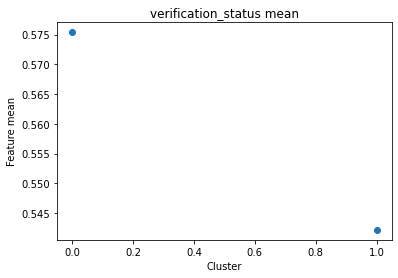

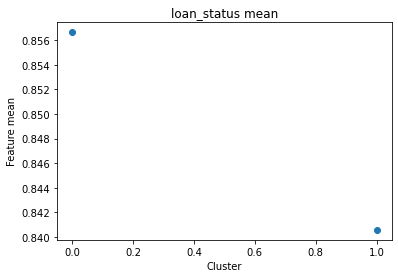

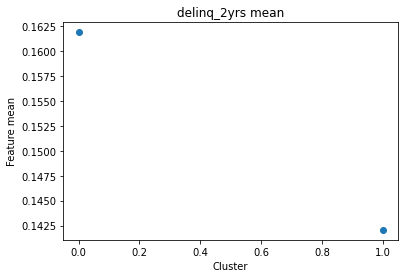

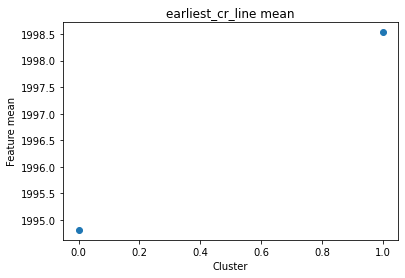

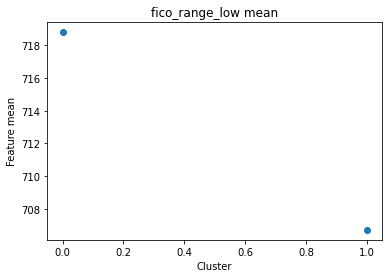

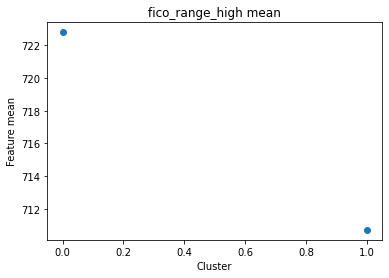

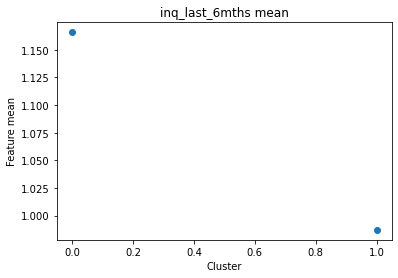

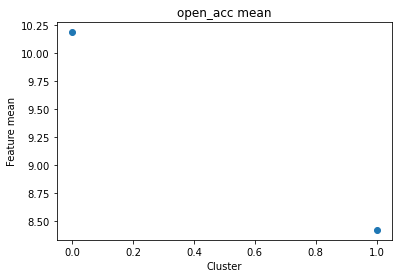

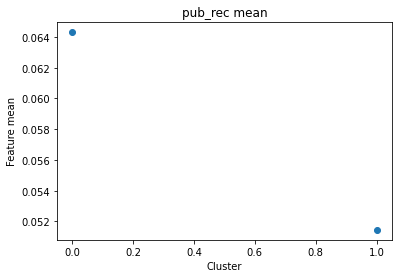

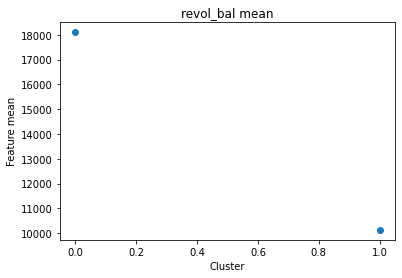

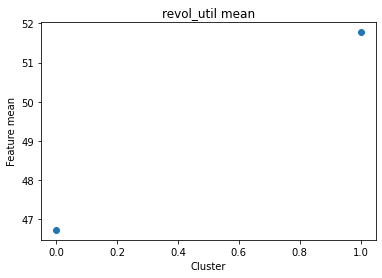

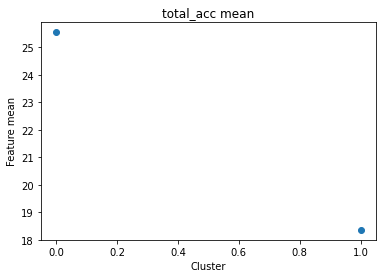

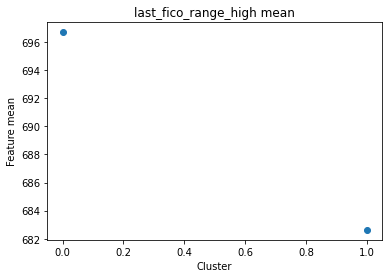

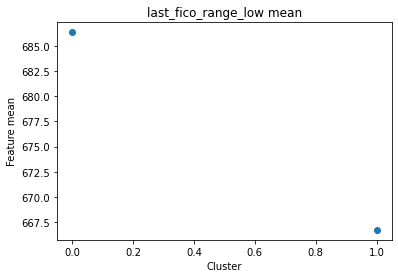

In [292]:
# Wykresy
for col_to_comp in cols_to_compare:
    plt.figure()
    param_list = [cluster_description[col_to_comp][param_name] for cluster_description in cluster_desc_hier]
    plt.scatter(list(range(len(param_list))), param_list)
    plt.xlabel('Cluster')
    plt.ylabel('Feature '+param_name)
    plt.title(col_to_comp + ' ' + param_name)

In [293]:
# W tym przypadku mamy tylko dwa klastry - łatwiej ocenić (na przykład po średniej) czym się różnią.
# Zdecydowane różnice polegają na śrendiej wysokości kredytu - klaster 0 ma dużo wyższą śrendią niż 1.
# Inną różnicą jest annual_inc - klaster 0 ma dużo większe wartości średnie niż 1.
# Ogólnie można wyciągnąć wniosek, że klaster 0 zawiera kredytobiorców "bardziej zamożnych".

In [294]:
# Klasteryzacja DBScan

In [295]:
# W celu wykorzystania metody DBScan musimy określić parametry eps oraz min_points. 
# Min points ustalamy zgodnie z https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
# na liczbę wymiarów naszych danych + 1
# Wyznaczenie optymalnego eps wymaga wykorzystnaia odległości międzypunktowych wyznaczonych z wykorzystaniem NearestNeighbors.

In [296]:
from sklearn.neighbors import NearestNeighbors

In [297]:
# Będziemy szukali najbliższego punktu dla danego (analizowanego w danej iteracji)
nghbrs = NearestNeighbors(n_neighbors=2)

In [298]:
nbrs = nghbrs.fit(X_clusters)

In [299]:
distances, indices = nbrs.kneighbors(X_clusters)

In [300]:
distances = np.sort(distances, axis=0)

In [301]:
distances = distances[:, 1]

Text(0, 0.5, 'Dystanse między punktem, a jego najbliższym sąsiadem -> eps')

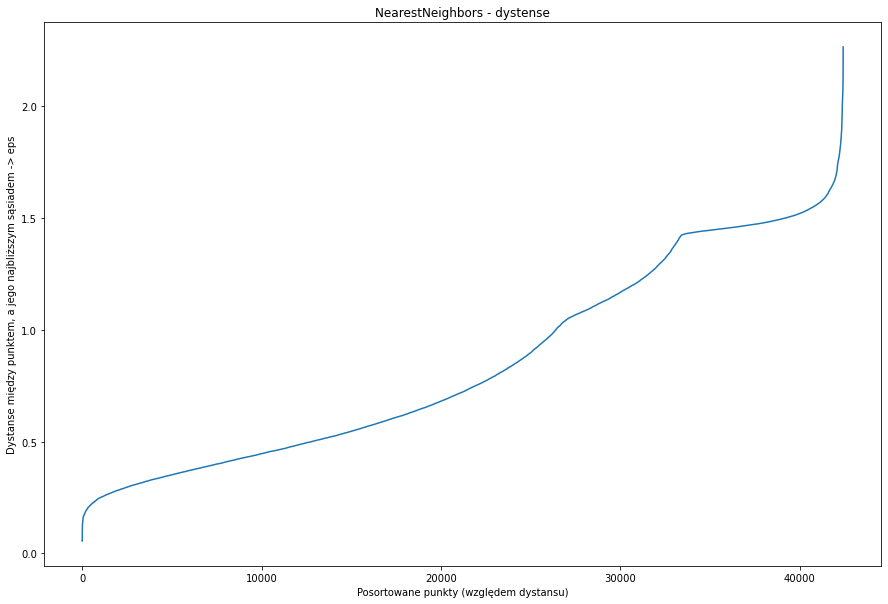

In [302]:
# Graficzne przedstawienie posortowanych dystansów
plt.figure(figsize=(15,10))
plt.plot(list(range(len(distances))), distances)
plt.title('NearestNeighbors - dystense')
plt.xlabel('Posortowane punkty (względem dystansu)')
plt.ylabel('Dystanse między punktem, a jego najbliższym sąsiadem -> eps')

In [303]:
# Zgodnie z metodą łokcia wybieramy eps = 0.85

In [304]:
# Klasteryzacja z zadanymi wybranymi parametrami (niestety, należalo zmniejszyc liczbę min_samples)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.85, min_samples=70)

In [305]:
dbscan.fit(X_clusters)

DBSCAN(eps=0.85, min_samples=70)

In [306]:
# Dodanie etykiet do ramki
labels_dbscan = pd.DataFrame(dbscan.labels_)
labeledDataDBScan = pd.concat((df_loan, labels_dbscan), axis = 1)
labeledDataDBScan = labeledDataDBScan.rename({0:'labels'},axis=1)

In [307]:
labeledDataDBScan['labels'].value_counts()

-1    42362
 0       70
Name: labels, dtype: int64

In [308]:
# Niestety, nawet drastyczne zmniejszenie liczby min_samples do 70 nie spowodowało utworzenia licznych klastrów. 
# Metoda została przetestowana, jednak nie dała oczekiwanych rezultatów. W tym przypadku dużo lepiej poradziły sobie metody 
# klasteryzacji kmeans oraz hierarchiczna, ale bardzo dobrze było sprawdzić również działanie DBScan i dobór parametrów
# zgodnie z podanym artykułem. 

In [309]:
# Przy wyborze optymalnych parametrów (zgodnie z artykułem - eps=0.85n min_samples >130) - wszystkie klastry zostają 
# zaklasyfikowane jako szum.

# Niewielka zmiana min_samples pozwoliła na utworzenie klastrów 1 i 0, ale o liczności jedynie 70 próbek. Klastry nie były
# wcale zbalansowane. Wyświetlone zostaną jedynie podsumwania każdego z nich poniżej.

In [310]:
# Opis klastrów
for cluster_no in range(2):
    print("Cluster "+str(cluster_no))
    desc = labeledDataDBScan[labeledDataDBScan['labels']==cluster_no].describe()
    print(desc)

Cluster 0
         loan_amnt   funded_amnt  funded_amnt_inv  term   int_rate  \
count     70.00000     70.000000        70.000000  70.0  70.000000   
mean    7645.00000   7330.714286      7091.331475  36.0   7.681714   
std     3380.49231   3250.435231      3130.296957   0.0   0.798059   
min     1200.00000   1200.000000      1200.000000  36.0   6.540000   
25%     5000.00000   5000.000000      5000.000000  36.0   7.340000   
50%     7950.00000   7500.000000      7087.500000  36.0   7.490000   
75%    10000.00000  10000.000000      9693.750000  36.0   7.900000   
max    16000.00000  14300.000000     13500.000000  36.0   9.320000   

       installment  emp_length     annual_inc  verification_status  \
count    70.000000   70.000000      70.000000                 70.0   
mean    228.723857    3.629981   62472.795286                  0.0   
std     101.465130    2.617163   32199.556345                  0.0   
min      37.220000    1.000000    9960.000000                  0.0   
25%     1

In [311]:
# Klasyfikacja

In [312]:
# Przygotowanie danych

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Podział danych na treningowe i testowe (0.8 - 0.2) 
# Dla uzyskania takich samych wyników przy ponownym uruchomieniu ustalamy jakiś random state (tutaj 123)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=123) 

# Skaler - dopasowanie do treningowych, a następnei normalizacja testowych z uzyskanymi wcześniej hiperparametrami.
min_max_scaler = MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(x_train)
x_test_norm = min_max_scaler.transform(x_test)

In [314]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Kod na podstawie materiałów dodatkowych
def plot_ROC(x_test, y_proba, y_test, model_str):
    # Przewidywanie prawdopodobieństwa
    # Tylko pozytywne wyniki (1)
    model_probs = y_proba[:, 1]
    # Obliczanie wyników roc_auc dla no_skill oraz modelu
    ns_probs = [0 for _ in range(len(model_probs))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, model_probs)
    # Podsumowanie
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_str+' ROC AUC=%.3f' % (model_auc))
    # Obliczenia krzywych ROC
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, model_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(12,4))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_str)
    # Nazwy osi
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [315]:
# Regresja logistyczna

In [316]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logistic = LogisticRegression()
logistic.fit(x_train_norm, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [317]:
logistic_proba = logistic.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Regresja logistyczna ROC AUC=0.866


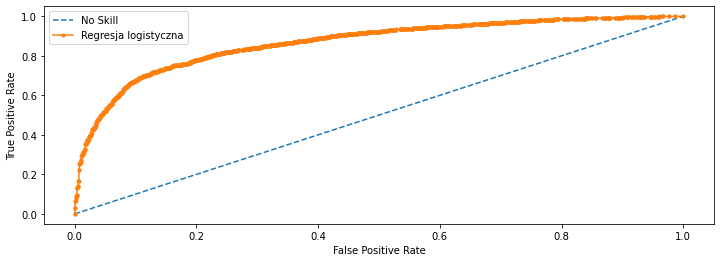

In [318]:
# Krzywa ROC
plot_ROC(x_test_norm, logistic_proba, y_test, 'Regresja logistyczna')

In [319]:
from sklearn.metrics import classification_report,confusion_matrix

In [320]:
y_pred_logistic = logistic.predict(x_test_norm)
confusion_matrix(y_test, y_pred_logistic)

array([[ 408,  874],
       [ 259, 6946]], dtype=int64)

In [321]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.61      0.32      0.42      1282
           1       0.89      0.96      0.92      7205

    accuracy                           0.87      8487
   macro avg       0.75      0.64      0.67      8487
weighted avg       0.85      0.87      0.85      8487



In [322]:
performance_report = classification_report(y_test, y_pred_logistic, output_dict=True)

In [323]:
performance_report

{'0': {'precision': 0.6116941529235382,
  'recall': 0.31825273010920435,
  'f1-score': 0.4186762442278091,
  'support': 1282},
 '1': {'precision': 0.888235294117647,
  'recall': 0.9640527411519778,
  'f1-score': 0.9245923460898503,
  'support': 7205},
 'accuracy': 0.8665017084953458,
 'macro avg': {'precision': 0.7499647235205926,
  'recall': 0.641152735630591,
  'f1-score': 0.6716342951588297,
  'support': 8487},
 'weighted avg': {'precision': 0.8464624953653379,
  'recall': 0.8665017084953458,
  'f1-score': 0.8481714149496197,
  'support': 8487}}

In [324]:
# Już na tym etapie osiągamy blisko 87% accuracy 

In [325]:
# Naiwny klasyfikator Bayesa

In [326]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_norm, y_train)

GaussianNB()

In [327]:
nb_proba = nb.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Naiwny Bayes ROC AUC=0.709


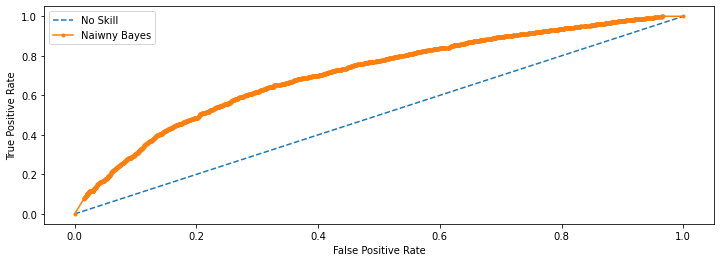

In [328]:
# Krzywa ROC
plot_ROC(x_test_norm, nb_proba, y_test, 'Naiwny Bayes')

In [329]:
y_pred_nb = nb.predict(x_test_norm)
confusion_matrix(y_test, y_pred_nb)

array([[ 990,  292],
       [3392, 3813]], dtype=int64)

In [330]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.23      0.77      0.35      1282
           1       0.93      0.53      0.67      7205

    accuracy                           0.57      8487
   macro avg       0.58      0.65      0.51      8487
weighted avg       0.82      0.57      0.63      8487



In [331]:
performance_report = classification_report(y_test, y_pred_nb, output_dict=True)

In [332]:
performance_report

{'0': {'precision': 0.22592423550890003,
  'recall': 0.7722308892355694,
  'f1-score': 0.34957627118644063,
  'support': 1282},
 '1': {'precision': 0.9288672350791718,
  'recall': 0.5292158223455934,
  'f1-score': 0.6742705570291777,
  'support': 7205},
 'accuracy': 0.5659243548957229,
 'macro avg': {'precision': 0.5773957352940359,
  'recall': 0.6507233557905814,
  'f1-score': 0.5119234141078092,
  'support': 8487},
 'weighted avg': {'precision': 0.8226844937749314,
  'recall': 0.5659243548957229,
  'f1-score': 0.6252240064871265,
  'support': 8487}}

In [333]:
# Accuracy ~57%

In [334]:
# Drzewo decyzyjne

In [335]:
from sklearn import tree
decisionTree_model = tree.DecisionTreeClassifier()
decisionTree_model.fit(x_train_norm, y_train)

DecisionTreeClassifier()

In [336]:
tree_proba = decisionTree_model.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Drzewko decyzyjne ROC AUC=0.657


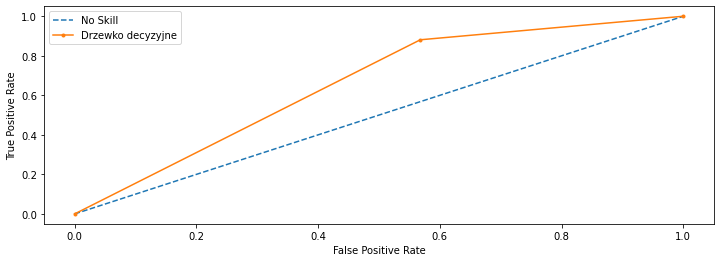

In [337]:
# Krzywa ROC
plot_ROC(x_test_norm, tree_proba, y_test, 'Drzewko decyzyjne')

In [338]:
y_pred_tree = decisionTree_model.predict(x_test_norm)
confusion_matrix(y_test, y_pred_tree)

array([[ 554,  728],
       [ 858, 6347]], dtype=int64)

In [339]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41      1282
           1       0.90      0.88      0.89      7205

    accuracy                           0.81      8487
   macro avg       0.64      0.66      0.65      8487
weighted avg       0.82      0.81      0.82      8487



In [340]:
performance_report = classification_report(y_test, y_pred_tree, output_dict=True)

In [341]:
performance_report

{'0': {'precision': 0.3923512747875354,
  'recall': 0.43213728549141966,
  'f1-score': 0.41128433556050475,
  'support': 1282},
 '1': {'precision': 0.8971024734982332,
  'recall': 0.8809160305343512,
  'f1-score': 0.8889355742296919,
  'support': 7205},
 'accuracy': 0.81312595734653,
 'macro avg': {'precision': 0.6447268741428843,
  'recall': 0.6565266580128855,
  'f1-score': 0.6501099548950984,
  'support': 8487},
 'weighted avg': {'precision': 0.8208575062840098,
  'recall': 0.81312595734653,
  'f1-score': 0.8167841793936017,
  'support': 8487}}

In [342]:
# Accuracy ~81% 

In [343]:
# Las losowy

In [344]:
from sklearn.ensemble import RandomForestClassifier

# Create a model and train it
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(x_train_norm, y_train)

RandomForestClassifier()

In [345]:
forest_proba = RandomForest_model.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Las losowy ROC AUC=0.869


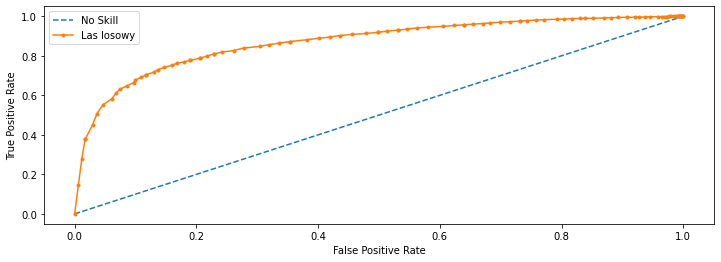

In [346]:
# Krzywa ROC
plot_ROC(x_test_norm, forest_proba, y_test, 'Las losowy')

In [347]:
y_pred_forest = RandomForest_model.predict(x_test_norm)
confusion_matrix(y_test, y_pred_forest)

array([[ 387,  895],
       [ 220, 6985]], dtype=int64)

In [348]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.64      0.30      0.41      1282
           1       0.89      0.97      0.93      7205

    accuracy                           0.87      8487
   macro avg       0.76      0.64      0.67      8487
weighted avg       0.85      0.87      0.85      8487



In [349]:
performance_report = classification_report(y_test, y_pred_forest, output_dict=True)

In [350]:
performance_report

{'0': {'precision': 0.6375617792421746,
  'recall': 0.30187207488299533,
  'f1-score': 0.4097406034939121,
  'support': 1282},
 '1': {'precision': 0.8864213197969543,
  'recall': 0.9694656488549618,
  'f1-score': 0.9260855154126616,
  'support': 7205},
 'accuracy': 0.8686225992694709,
 'macro avg': {'precision': 0.7619915495195644,
  'recall': 0.6356688618689785,
  'f1-score': 0.6679130594532868,
  'support': 8487},
 'weighted avg': {'precision': 0.848829952883884,
  'recall': 0.8686225992694709,
  'f1-score': 0.8480892650203159,
  'support': 8487}}

In [351]:
# Accuracy ~87%

In [352]:
# XGBoost 

In [353]:
# XGBoost Classifier 
from xgboost import XGBClassifier

XGBoost_model = XGBClassifier()
XGBoost_model.fit(x_train_norm, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_proba = XGBoost_model.predict_proba(x_test_norm)

In [ ]:
# Krzywa ROC
plot_ROC(x_test_norm, xgb_proba, y_test, 'XGBoost Classifier')

In [ ]:
y_pred_xgb = XGBoost_model.predict(x_test_norm)
confusion_matrix(y_test, y_pred_xgb)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

In [ ]:
performance_report = classification_report(y_test, y_pred_xgb, output_dict=True)

In [ ]:
performance_report

In [ ]:
# Accuracy bardzo wysokie - ~87%

In [ ]:
# PCA i te same modele co w poprzedniej analizie

In [ ]:
x_train_norm.shape

In [ ]:
# Transformacja do 25 kolumn z 127. (kompresja o 80%)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=25)

In [ ]:
# Transformacja

In [ ]:
x_train_norm_PCA = pca.fit_transform(x_train_norm) 

In [ ]:
x_test_norm_PCA = pca.transform(x_test_norm)

In [ ]:
x_train_norm_PCA.shape

In [ ]:
# Regresja logistyczna

In [ ]:
logistic_PCA = LogisticRegression()
logistic_PCA.fit(x_train_norm_PCA, y_train)
y_pred_logistic_PCA = logistic_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_logistic_PCA))
print(classification_report(y_test, y_pred_logistic_PCA))
performance_report = classification_report(y_test, y_pred_logistic_PCA, output_dict=True)
performance_report

In [ ]:
# Accuracy spadło z ~87% do 85%

In [ ]:
# Naiwny Bayes

In [ ]:
nb_PCA = GaussianNB()
nb_PCA.fit(x_train_norm_PCA, y_train)
y_pred_nb_PCA = nb_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_nb_PCA))
print(classification_report(y_test, y_pred_nb_PCA))
performance_report = classification_report(y_test, y_pred_nb_PCA, output_dict=True)
performance_report

In [ ]:
# Accuracy wzrosło z 57% do aż 80%

In [ ]:
# Drzewo decyzyjne

In [ ]:
decisionTree_model_PCA = tree.DecisionTreeClassifier()
decisionTree_model_PCA.fit(x_train_norm_PCA, y_train)
y_pred_tree_PCA = decisionTree_model_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_tree_PCA))
print(classification_report(y_test, y_pred_tree_PCA))
performance_report = classification_report(y_test, y_pred_tree_PCA, output_dict=True)
performance_report

In [ ]:
# Accuracy spadło z 81% do 76%

In [ ]:
# Las losowy

In [ ]:
RandomForest_model_PCA = RandomForestClassifier()
RandomForest_model_PCA.fit(x_train_norm_PCA, y_train)
y_pred_forest_PCA = RandomForest_model_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_forest_PCA))
print(classification_report(y_test, y_pred_forest_PCA))
performance_report = classification_report(y_test, y_pred_forest_PCA, output_dict=True)
performance_report

In [ ]:
# Accuracy spadło z 87% do ~85%.

In [ ]:
# XGBoost

In [ ]:
XGBoost_model_PCA = XGBClassifier()
XGBoost_model_PCA.fit(x_train_norm_PCA, y_train)
y_pred_xgb_PCA = XGBoost_model_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_xgb_PCA))
print(classification_report(y_test, y_pred_xgb_PCA))
performance_report = classification_report(y_test, y_pred_xgb_PCA, output_dict=True)
performance_report

In [ ]:
# Accuracy spadlo z 87% do 84.4%.

In [ ]:
# Podusmowanie PCA

In [ ]:
# Podsumowując - kompresja danych z wykorzystaniem transformacji PCA pogorszyła działanie modelu w 4/5 przypadków. 
# Objawiło się to między innymi zmniejszeniem dokładności klasyfikacji (accuracy) oraz pogorszeniem macierzy pomyłek -
# więcej źle sklasyfikowanych próbek. Transformacja PCA zwiększyła dokładność klasyfikacji jedynie dla modelu 
# klasyfikacyjnego Nawiwny Bayes - był to zaskakujący wzrost, bo aż 23%. W przypadku pozostałych modeli accuracy
# spadło średnio po kilka % (2, 5). Transformacja PCA w tym przypadku nie ma uzasadnienia. Modele uczą się na tyle
# szybko, że nie musimy redukować cech. Transformacja taka mogłaby mieć sens w przypadku chęci wizualizacji danych, jednak
# nie jest tutaj (w naszym przpadku) pomocna w klasyfikacji. Pogarasza ona accuracy najlepszych modeli.

In [ ]:
# Wybranie finalnego modelu oraz jego analiza

In [ ]:
# Zgodnie ze wcześniejszymi punktami, analiza modeli pokazała, że najlepszym okazał się klasyfikator las losowy i XGBoost.
# Osiągane dokładności klasyfikacji były porónywalne i wynosiły około 87%. Zdecydowano na wybór XGBoost.
# Spróbujemy zastosować kroki opisane w instrukcji do projektu.

In [ ]:
final_model = XGBClassifier(booster = 'dart', max_depth = 4, learning_rate = 0.1, max_delta_step=10, gamma=0.3)

In [ ]:
# Dobrane parametry wyświetlono poniżej 
final_model.fit(x_train_norm, y_train)

In [ ]:
y_pred_final_model = final_model.predict(x_test_norm)

In [ ]:
final_model_proba = final_model.predict_proba(x_test_norm)

In [ ]:
# Krzywa ROC
plot_ROC(x_test_norm, final_model_proba, y_test, 'FINAL XGBoost Classifier')

In [ ]:
print(confusion_matrix(y_test, y_pred_final_model))

In [ ]:
print(classification_report(y_test, y_pred_final_model))

In [ ]:
performance_report = classification_report(y_test, y_pred_final_model, output_dict=True)
performance_report

In [ ]:
# Doór parametrów pozwolił poprawić accuracy - teraz przekracza 87% skuteczności. 

In [ ]:
# Walidacja krzyżowa
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits=10)

In [ ]:
result = cross_val_score(final_model, X_clusters, Y, cv=kfold)

In [ ]:
print("Accuracy z wykorzystaniem walidacji krzyżowej", result.mean())

In [ ]:
# Jak widać, walidacja krzyżowa pozwoliła na osiągnięcie wyższego accuracy niż podzial danych z wykorzystaniem
# train, test, split - jest to symboliczny wzrost, ale jest.

In [ ]:
# Otrzymanie krzywych uczenia
evalset = [(x_train_norm, y_train), (x_test_norm, y_test)]
# Model
final_model = XGBClassifier(booster = 'dart', max_depth = 4, learning_rate = 0.1, max_delta_step=10, gamma=0.3)
final_model.fit(x_train_norm, y_train, eval_metric='logloss', eval_set=evalset)

In [ ]:
results = final_model.evals_result()

In [ ]:
# Wykreślenie krzywych uczenia
plt.figure(figsize=(15,10))
plt.plot(results['validation_0']['logloss'], label='Dane treningowe')
plt.plot(results['validation_1']['logloss'], label='Dane testowe')
# Legenda
plt.xlabel('Iteracje')
plt.ylabel('logloss')
plt.legend()
plt.show()

In [ ]:
# Rysunek powyżej prezentuje krzywą uczenia (100 iteracji). Wartości błędu (logloss) są już stała po 50 iteracji. 
# Modelowi wystarczy mniej estymatorów do poprawnego działania - na przykład 50. Wtedy mamy pewność, że nie będzie on 
# pozbwiony generalizacji (przetrenowany).

In [ ]:
# Sprawdźmy jeszcze raz - mniej estymatorów
evalset = [(x_train_norm, y_train), (x_test_norm, y_test)]
# Model
final_model = XGBClassifier(n_estimators = 50, booster = 'dart', max_depth = 4, learning_rate = 0.1, max_delta_step=10, gamma=0.3)
final_model.fit(x_train_norm, y_train, eval_metric='logloss', eval_set=evalset)

results = final_model.evals_result()

# Wykreślenie krzywych uczenia
plt.figure(figsize=(15,10))
plt.plot(results['validation_0']['logloss'], label='Dane treningowe')
plt.plot(results['validation_1']['logloss'], label='Dane testowe')
# Legenda
plt.xlabel('Iteracje')
plt.ylabel('logloss')
plt.legend()
plt.show()

In [ ]:
y_pred_final_model = final_model.predict(x_test_norm)
final_model_proba = final_model.predict_proba(x_test_norm)
# Krzywa ROC
plot_ROC(x_test_norm, final_model_proba, y_test, 'FINAL XGBoost Classifier')
print(confusion_matrix(y_test, y_pred_final_model))
print(classification_report(y_test, y_pred_final_model))
performance_report = classification_report(y_test, y_pred_final_model, output_dict=True)
performance_report

In [ ]:
# Jak widać, wykorzystano mniej estymatorów i jakość klasyfikatora nadal jest bardzo dobra - przekraczamy 87% dokładności. 
# Mamy jednak pewność, że nie dotrenowywaliśmy modelu na marne i przeciwdziałamy przeuczeniu.

In [ ]:
# Na koniec przedstawmy ważność cech

In [ ]:
feature_imp = final_model.feature_importances_

In [ ]:
feature_imp

In [ ]:
cols_to_plot = df_loan.drop(columns=['loan_status']).columns

In [ ]:
# Wypiszmy najbardziej istotne cechy wraz z ich "ważnościami"
for feature_idx, feature_importance in enumerate(feature_imp):
    if(feature_importance > 0):
        print("Cecha: ",cols_to_plot[feature_idx], ", ważność: ", feature_importance)

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(list(range(len(final_model.feature_importances_))), final_model.feature_importances_)
plt.xticks(np.arange(len(cols_to_plot)), cols_to_plot)
plt.xticks(rotation=90)

In [ ]:
# Podsumowanie

In [ ]:
# Po powiększeniu wykresu okazuje się, że najbardziej istotną cechą jest cecha last_fico_range_high, term oraz 
# debt_settlement_flag. Co cieakwe, wśród istotnych cech znalazła się również utworzona cecha - dlugośc ogłoszenia oraz
# wiele cech powstałych po one-hot-encode (między innymi addr_state). Podejmowanie przez model decyzji w opraciu o wskaźnik
# fico jest jak najbardziej uzasadnione. Zmienna odpowiadająca za wysokość kredytu oraz jego oprocentowanie również biorą
# udzial w podejmowaniu decyzji. Osiągnięta skuteczność klasyfikacji na poziomie 87% spełnia założenia projektu 
# i jest jak najbardziej satysfakcjonująca. Zarónwo model XGBoost, jak również lasy losowe pozwalają na osiąganie 
# bardzo dobrych wyników w tego typu zastosowaniach. Okazuje się, że po zastosowaniu transformacji PCA, 
# klasyfikator Bayesa osiągający bardzo niskie skuteczności na danych pełnych - po ich komprecji może konkurować z najlepszymi
# modelami. W przypadku pozostałych klasyfikatorów - transformacja PCA nie przyniosła wzrostu dokładności klasyfikacji.